# 1. File Preperation 

In [120]:
# Importing Packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [123]:
# Importing Data
data_hedonic_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian_raw = pd.read_csv('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [122]:
# Filtering after only helpful reviews
data_hedonic = data_hedonic_raw[data_hedonic_raw['helpful_vote'] != 0]
data_utilitarian = data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] != 0]

In [11]:
# Combining data in one dataframe
data= pd.concat([data_hedonic_raw, data_utilitarian_raw])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Statistic of features

First of all we want to look at different features that could be extracted from the review data. Therefore I built some functions for easier data handling and statistical analysis of the features. 

## Functions for Building Summary statistic 

In [12]:
# Function for building summary statistics for numerical columns

def summary_statistic(df, groupby_column):
    # Define the numerical columns for which summary statistics will be calculated
    numerical_columns = ['rating', 'sentiment', 'subjective_score', 'word_count', 
                         'sent_count', 'sent_length', 'title_length', 'review_ext', 
                         '#adj', '#adv', '#nouns', 'elap_days', 'image', 'FRE','Sentiment_Classification']

    # Group by given column and calculate aggregate statistics
    summary_stats = df.groupby(groupby_column)[numerical_columns].agg(['mean', 'median', 'std'])

    # Flatten MultiIndex columns
    summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

    # Transposing the DataFrame
    summary_stats = summary_stats.transpose()

    return summary_stats

In [13]:
# Only calculate for the mean of the numerical columns

def calculate_mean(df, groupby_column):
    # Group by the specified column and calculate aggregate statistics
    summary_mean = df.groupby(groupby_column).agg({
        'rating': ['mean'],
        'review_ext': ['mean'],
        'sentiment': ['mean'],
        'subjective_score': ['mean'],
        'word_count': ['mean'],
        'sent_count': ['mean'],
        'sent_length': ['mean'],
        'title_length': ['mean'],
        'FRE': ['mean'],
        '#adj': ['mean'],
        '#adv': ['mean'],
        '#nouns': ['mean'],
        'elap_days': ['mean'],
    })

    # Flatten the MultiIndex columns
    summary_mean.columns = ['_'.join(col).strip() for col in summary_mean.columns.values]

    # Transpose the DataFrame
    summary_mean = summary_mean.transpose()

    return summary_mean

## Summary Statistic of Helpful Reviews

In the following, a straightforward statistical analysis is conducted without graphical representation, focusing on various factors such as product type or main category.

In [14]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'prod_type')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_ProdType_mean.csv')

prod_type                        0            1
rating_mean               2.977031     3.827217
review_ext_mean          -1.637611    -0.792044
sentiment_mean            3.003445     3.895794
subjective_score_mean     0.786528     0.820668
word_count_mean          65.070629    51.384141
sent_count_mean           4.240884     3.742834
sent_length_mean         17.103927    15.341133
title_length_mean         1.267873     1.392714
FRE_mean                 79.615877    82.633916
#adj_mean                 0.095079     0.100166
#adv_mean                 0.079453     0.069959
#nouns_mean               0.187579     0.182989
elap_days_mean         1182.001436  1538.897669


In [15]:
# Summary of data after helpful reviews
summary_stats_helpful = calculate_mean(data_helpful, 'main_category')

# Display the DataFrame
print(summary_stats_helpful)

# Saving to CSV
summary_stats_helpful.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Category_mean.csv')

main_category           Appliances       Beauty  Electronics     Grocery  \
rating_mean               2.476945     4.029299     2.738172    3.794175   
review_ext_mean          -2.223055    -0.511635    -1.895334   -1.005825   
sentiment_mean            2.540346     4.076433     2.753727    3.850485   
subjective_score_mean     0.782660     0.822641     0.770538    0.811931   
word_count_mean          65.724784    50.067516    76.683085   35.704854   
sent_count_mean           4.582133     3.705732     4.500972    2.970874   
sent_length_mean         16.680019    15.415137    18.657825   14.226983   
title_length_mean         1.276657     1.264544     1.244329    1.588350   
FRE_mean                 76.810620    83.340144    77.264563   79.552330   
#adj_mean                 0.077548     0.101336     0.088839    0.107984   
#adv_mean                 0.071440     0.073082     0.081790    0.062273   
#nouns_mean               0.199152     0.181166     0.187319    0.185982   
elap_days_me

In [16]:
# Summary of data after helpful reviews
summary_help_hedonic = calculate_mean(data_hedonic, 'product')

# Display the DataFrame
print(summary_help_hedonic)

# Saving to CSV
summary_help_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Hedonic_mean.csv')

product                 Chocolate  Facial Spray       Music      Perfume  \
rating_mean              3.794175      4.125809    2.788835     3.890041   
review_ext_mean         -1.005825     -0.374191   -1.854369    -0.709959   
sentiment_mean           3.850485      4.186916    3.099515     3.917012   
subjective_score_mean    0.811931      0.827764    0.834365     0.815249   
word_count_mean         35.704854     49.456506   59.092233    50.949170   
sent_count_mean          2.970874      3.653487    4.555825     3.781120   
sent_length_mean        14.226983     14.895422   14.342856    16.165057   
title_length_mean        1.588350      1.258807    1.771845     1.272822   
FRE_mean                79.552330     82.821280   83.102015    84.088838   
#adj_mean                0.107984      0.099294    0.102463     0.104282   
#adv_mean                0.062273      0.072097    0.068645     0.074505   
#nouns_mean              0.185982      0.183141    0.168750     0.178317   
elap_days_me

In [17]:
# Summary of data after helpful reviews
summary_help_ut = calculate_mean(data_utilitarian, 'product')

# Display the DataFrame
print(summary_help_ut)

# Saving to CSV
summary_help_ut.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Helpful/Summary_Stats_Utilitarian_mean.csv')

product                    Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean               2.823587     2.476945      2.568665     4.126606   
review_ext_mean          -1.776413    -2.223055     -2.131335    -0.473394   
sentiment_mean            2.811891     2.540346      2.638298     4.099083   
subjective_score_mean     0.758146     0.782660      0.795130     0.840303   
word_count_mean          56.302144    65.724784    117.129594    69.577982   
sent_count_mean           3.787524     4.582133      5.916828     4.737615   
sent_length_mean         16.494291    16.680019     22.951416    16.713614   
title_length_mean         1.277778     1.276657      1.177950     1.260550   
FRE_mean                 78.741764    76.810620     74.333017    84.211083   
#adj_mean                 0.087855     0.077548      0.090790     0.102456   
#adv_mean                 0.086393     0.071440      0.072656     0.075858   
#nouns_mean               0.185642     0.199152      0.190647   

### Analyzing Mean of Review Data

In [18]:
# Calculating Mean for Data after Main category 
summary_mean = calculate_mean(data, 'main_category')

# Display the summary statistics
print(summary_mean)

# Saving to CSV
summary_mean.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Category_mean.csv')

main_category           Appliances       Beauty  Electronics     Grocery  \
rating_mean               3.976762     4.321394     3.864184    4.474078   
review_ext_mean          -0.723238    -0.234736    -0.771454   -0.325922   
sentiment_mean            3.890148     4.352390     3.822784    4.397465   
subjective_score_mean     0.784201     0.800577     0.778130    0.801484   
word_count_mean          27.000576    26.390550    40.375089   19.938940   
sent_count_mean           2.410793     2.415966     2.864982    2.102535   
sent_length_mean         11.528881    11.825923    14.509245   10.627039   
title_length_mean         1.406952     1.506199     1.317021    1.848502   
FRE_mean                 78.876121    86.893946    80.610742   81.531915   
#adj_mean                 0.125282     0.125501     0.112677    0.124028   
#adv_mean                 0.071905     0.073742     0.088519    0.065782   
#nouns_mean               0.195732     0.188988     0.196092    0.196227   
elap_days_me

In [19]:
# Calculating Mean after Producty Type and Data 
summary_stats_data = calculate_mean(data, 'prod_type')

# Print the summary statistics
print(summary_stats_data)

# Saving to CSV
summary_stats_data.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType_mean.csv')

prod_type                        0            1
rating_mean               3.982482     4.321237
review_ext_mean          -0.651075    -0.307033
sentiment_mean            3.931556     4.328306
subjective_score_mean     0.790767     0.801894
word_count_mean          35.554479    26.528747
sent_count_mean           2.764067     2.413129
sent_length_mean         13.355088    11.714510
title_length_mean         1.352315     1.591194
FRE_mean                 81.618437    85.972370
#adj_mean                 0.118786     0.120292
#adv_mean                 0.082632     0.070225
#nouns_mean               0.194156     0.191486
elap_days_mean         1294.805984  1449.665571


In [20]:
# Calculating Mean for hedonic products and product
summary_stats_hedonic = calculate_mean(data_hedonic, 'product')

# Display results
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic_mean.csv')

product                 Chocolate  Facial Spray       Music      Perfume  \
rating_mean              3.794175      4.125809    2.788835     3.890041   
review_ext_mean         -1.005825     -0.374191   -1.854369    -0.709959   
sentiment_mean           3.850485      4.186916    3.099515     3.917012   
subjective_score_mean    0.811931      0.827764    0.834365     0.815249   
word_count_mean         35.704854     49.456506   59.092233    50.949170   
sent_count_mean          2.970874      3.653487    4.555825     3.781120   
sent_length_mean        14.226983     14.895422   14.342856    16.165057   
title_length_mean        1.588350      1.258807    1.771845     1.272822   
FRE_mean                79.552330     82.821280   83.102015    84.088838   
#adj_mean                0.107984      0.099294    0.102463     0.104282   
#adv_mean                0.062273      0.072097    0.068645     0.074505   
#nouns_mean              0.185982      0.183141    0.168750     0.178317   
elap_days_me

In [21]:
# Calculating Mean for utilitarian products and product
summary_stats_utilitarian = calculate_mean(data_utilitarian, 'product')

# Display results
print(summary_stats_utilitarian)

# Saving to CSV
summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian_mean.csv')

product                    Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean               2.823587     2.476945      2.568665     4.126606   
review_ext_mean          -1.776413    -2.223055     -2.131335    -0.473394   
sentiment_mean            2.811891     2.540346      2.638298     4.099083   
subjective_score_mean     0.758146     0.782660      0.795130     0.840303   
word_count_mean          56.302144    65.724784    117.129594    69.577982   
sent_count_mean           3.787524     4.582133      5.916828     4.737615   
sent_length_mean         16.494291    16.680019     22.951416    16.713614   
title_length_mean         1.277778     1.276657      1.177950     1.260550   
FRE_mean                 78.741764    76.810620     74.333017    84.211083   
#adj_mean                 0.087855     0.077548      0.090790     0.102456   
#adv_mean                 0.086393     0.071440      0.072656     0.075858   
#nouns_mean               0.185642     0.199152      0.190647   

### Total Analysis (mean, median, variance)

In [22]:
# Summary of hedonic data
summary_stats_hedonic = summary_statistic(data_hedonic_raw, 'product')

# Display the summary statistics
print(summary_stats_hedonic)

# Saving to CSV
summary_stats_hedonic.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Hedonic.csv')


TypeError: Could not convert positivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositiveneutralnegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralpositivepositivepositivenegativepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralnegativepositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivepositiveneutralneutralnegativepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivenegativepositiveneutralpositiveneutralpositivepositiveneutralpositiveneutralneutralpositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativenegativeneutralnegativepositivenegativepositivepositivepositivepositivepositiveneutralnegativepositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveneutralpositivenegativenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralneutralpositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivenegativepositivepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativeneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralnegativepositivenegativepositivenegativepositivenegativepositiveneutralneutralpositivepositivepositivepositiveneutralpositiveneutralnegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralnegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativenegativepositivenegativepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositiveneutralpositivepositiveneutralpositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivenegativeneutralneutralpositivenegativepositivepositivenegativepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivenegativepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositiveneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivenegativepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralnegativepositivepositivenegativepositiveneutralneutralpositivepositiveneutralnegativepositiveneutralneutralnegativepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositiveneutralnegativenegativepositivepositiveneutralpositivenegativeneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivenegativenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralnegativenegativepositiveneutralneutralpositivepositivepositivepositivenegativepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivenegativepositivepositivepositiveneutralneutralnegativeneutralpositivepositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositiveneutralnegativepositivepositiveneutralneutralnegativepositivepositiveneutralpositivepositivepositivepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativeneutralpositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralnegativeneutralpositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositiveneutralnegativepositivepositivepositiveneutralpositiveneutralnegativepositiveneutralnegativepositivepositiveneutralpositivenegativenegativepositivepositivepositivepositivenegativepositivepositiveneutralpositiveneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivenegativenegativepositivepositivepositivepositivepositivepositiveneutralnegativeneutralpositivepositivepositiveneutralpositivenegativepositivepositivenegativepositivepositivenegativenegativepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativenegativepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositiveneutralpositivenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralpositivenegativepositivepositivenegativepositivenegativenegativepositiveneutralpositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositiveneutralnegativepositivepositivepositivepositivenegativeneutralpositivepositivenegativepositivepositivepositiveneutralpositivepositiveneutralnegativenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveneutralpositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativeneutralpositiveneutralpositivepositivepositivenegativepositiveneutralpositiveneutralpositivepositiveneutralpositiveneutralpositivepositivepositivenegativenegativepositivenegativenegativenegativepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositivepositiveneutralpositivepositivenegativepositivepositivenegativepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralnegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativeneutralpositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralpositiveneutralpositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositivepositiveneutralneutralpositivepositivepositivepositivenegativepositivepositivenegativepositivenegativenegativepositivepositivenegativenegativeneutralnegativeneutralneutralpositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativenegativeneutralnegativepositiveneutralpositivenegativeneutralpositivepositiveneutralpositiveneutralnegativeneutralpositiveneutralnegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralnegativepositivepositivepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativenegativenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositivepositivepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositiveneutralpositivepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivenegativepositiveneutralpositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralneutralpositiveneutralpositiveneutralneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositiveneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivenegativepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivepositivenegativeneutralpositiveneutralpositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativepositiveneutralpositivepositivenegativepositivepositiveneutralpositivepositiveneutralnegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativenegativepositiveneutralpositiveneutralpositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivenegativepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositiveneutralnegativenegativeneutralpositivepositiveneutralpositivepositivepositivepositiveneutralpositivenegativeneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositiveneutralpositiveneutralpositivepositivepositivepositivenegativepositiveneutralneutralpositivenegativenegativenegativeneutralpositivepositivepositiveneutralnegativenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivepositivepositivepositivenegativepositivenegativenegativepositiveneutralneutralpositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositivepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivenegativeneutralpositivepositivepositiveneutralpositivepositivenegativeneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivenegativepositivepositivepositivepositivenegativepositiveneutralneutralneutralneutralnegativepositiveneutralpositivenegativeneutralpositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativenegativenegativepositivepositivenegativepositiveneutralnegativenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositiveneutralpositiveneutralpositivenegativenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositiveneutralneutralpositivepositivepositiveneutralpositivepositiveneutralpositivepositivepositivepositivenegativepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositivepositiveneutralnegativepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralpositivepositivenegativepositivepositiveneutralpositivepositivepositivenegativeneutralpositivepositiveneutralneutralneutralpositiveneutralneutralpositivenegativepositiveneutralpositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivepositivepositivenegativepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositiveneutralneutralneutralpositiveneutralnegativepositivepositivenegativepositivepositivepositiveneutralnegativeneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralnegativepositivepositivenegativepositiveneutralnegativepositivepositivepositivepositiveneutralneutralpositivepositivepositivepositivepositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivenegativeneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivenegativepositiveneutralpositivenegativepositivepositivepositiveneutralpositivepositivenegativepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivenegativenegativepositivenegativepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativepositiveneutralpositivepositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositiveneutralpositiveneutralpositivepositivepositivepositiveneutralpositivenegativenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositiveneutralnegativepositivepositivenegativepositivepositivepositivenegativepositivepositiveneutralnegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositiveneutralpositivenegativepositivepositivepositivepositivenegativepositivenegativenegativepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositiveneutralpositivepositivepositiveneutralnegativepositivepositivepositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivenegativeneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivenegativenegativepositivenegativepositiveneutralpositiveneutralpositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositiveneutralnegativepositivepositivepositivenegativepositiveneutralpositivepositivepositivepositiveneutralneutralnegativepositivenegativeneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositivenegativeneutralnegativepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivenegativepositivenegativepositiveneutralpositivenegativepositivenegativepositivepositivenegativepositivenegativepositivepositivenegativeneutralpositivepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativeneutralneutralpositivenegativenegativepositivepositivepositiveneutralpositivenegativepositivenegativepositiveneutralpositivepositivepositiveneutralpositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivenegativenegativepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivenegativepositivepositiveneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivenegativepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativenegativeneutralpositiveneutralneutralpositivepositivenegativeneutralpositivepositivepositivepositiveneutralneutralpositivepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivenegativepositiveneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositivepositivepositivenegativepositivepositivenegativepositivepositivepositivepositivepositiveneutralpositivepositivenegativepositiveneutralnegativepositiveneutralpositivepositivenegativenegativepositivepositivepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivenegativepositivenegativepositivepositivepositivepositivepositivepositiveneutralpositivepositivepositivepositiveneutralneutralpositivepositivepositivepositivepositivepositivepositivepositivepositivepositivepositiveneutralpositivenegativepositivepositivepositivepositiveneutralpositive to numeric

In [ ]:
# Summary of utilitarian data
summary_stats_utilitarian = summary_statistic(data_utilitarian_raw, 'product')

# Display the DataFrame
print(summary_stats_utilitarian)

summary_stats_utilitarian.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_Utilitarian.csv')

product                      Battery       Filter  Gaming Mouse   Hair Brush  \
rating_mean                 3.900000     3.976762      3.799502     4.467546   
rating_median               5.000000     5.000000      5.000000     5.000000   
rating_std                  1.552382     1.572562      1.561097     1.114636   
sentiment_mean              3.860744     3.890148      3.754229     4.427968   
sentiment_median            5.000000     5.000000      5.000000     5.000000   
sentiment_std               1.676241     1.661475      1.604700     1.190469   
subjective_score_mean       0.755289     0.784201      0.819381     0.848176   
subjective_score_median     0.830232     0.851860      0.885371     0.921056   
subjective_score_std        0.233592     0.209121      0.186372     0.175156   
word_count_mean            27.602204    27.000576     63.442537    38.293931   
word_count_median          17.000000    15.000000     40.000000    26.000000   
word_count_std             35.401706    

In [ ]:
# Summary of data after Product Type
summary_stats_prodType = summary_statistic(data, 'prod_type')

# Display the DataFrame
print(summary_stats_prodType)

#Saving to CSV
summary_stats_prodType.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Total/Summary_Stats_ProdType.csv')

prod_type                          0            1
rating_mean                 3.982482     4.321237
rating_median               5.000000     5.000000
rating_std                  1.511750     1.266600
sentiment_mean              3.931556     4.328306
sentiment_median            5.000000     5.000000
sentiment_std               1.600143     1.311158
subjective_score_mean       0.790767     0.801894
subjective_score_median     0.866606     0.902643
subjective_score_std        0.210857     0.228401
word_count_mean            35.554479    26.528747
word_count_median          20.000000    16.000000
word_count_std             48.505235    38.320619
sent_count_mean             2.764067     2.413129
sent_count_median           2.000000     2.000000
sent_count_std              2.541804     2.160877
sent_length_mean           13.355088    11.714510
sent_length_median         11.500000    10.000000
sent_length_std             9.873270     8.531808
title_length_mean           1.352315     1.591194


# 3. Graphs and Plots for Dataanalysis 

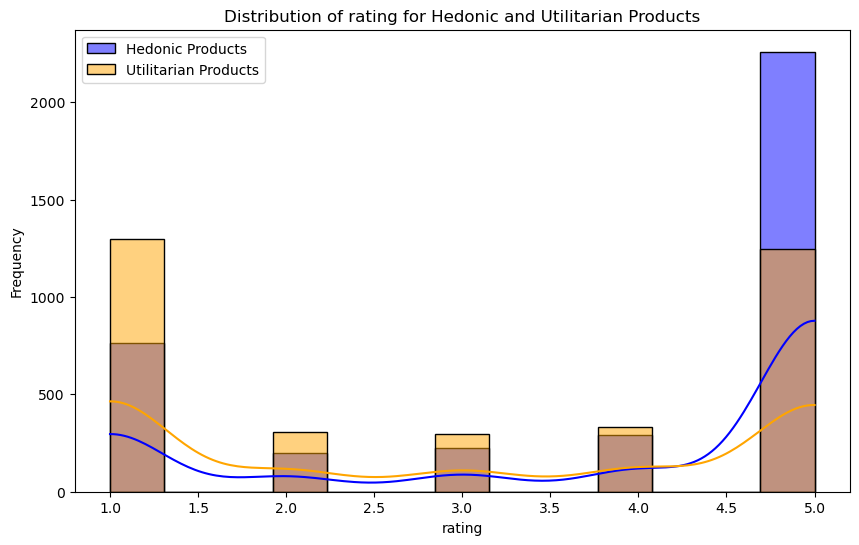

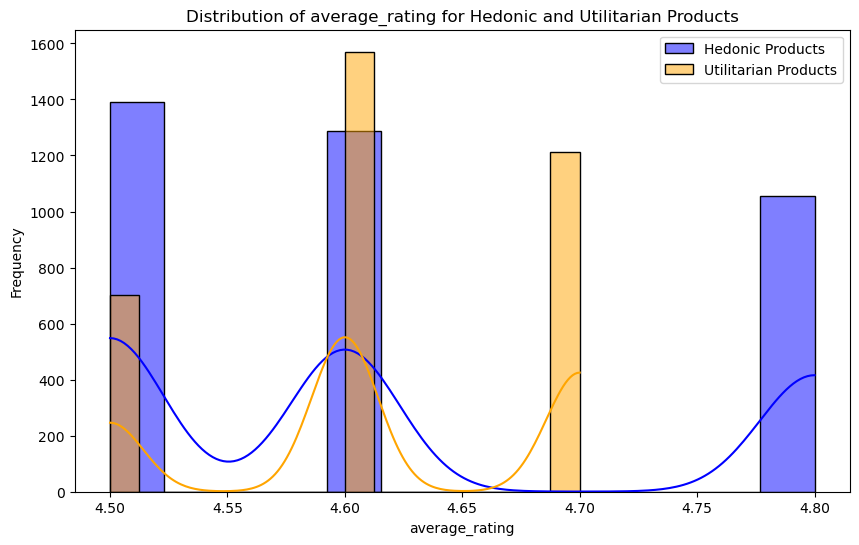

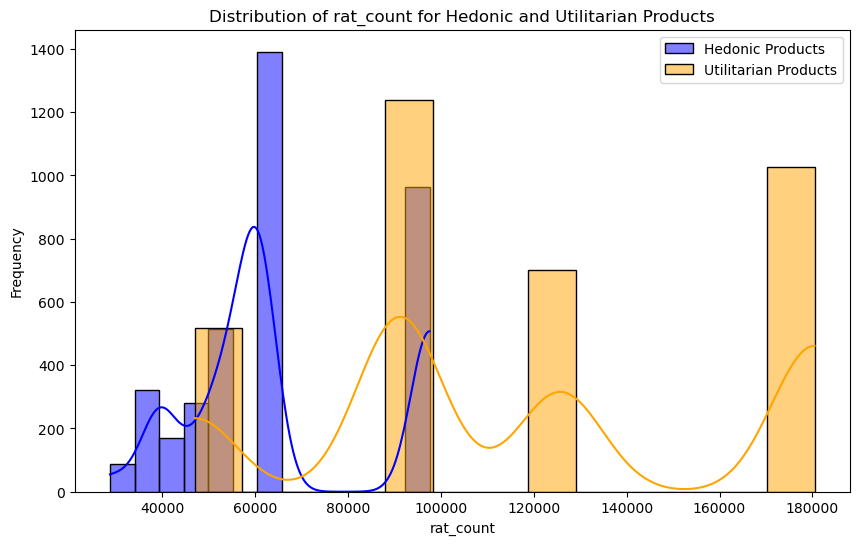

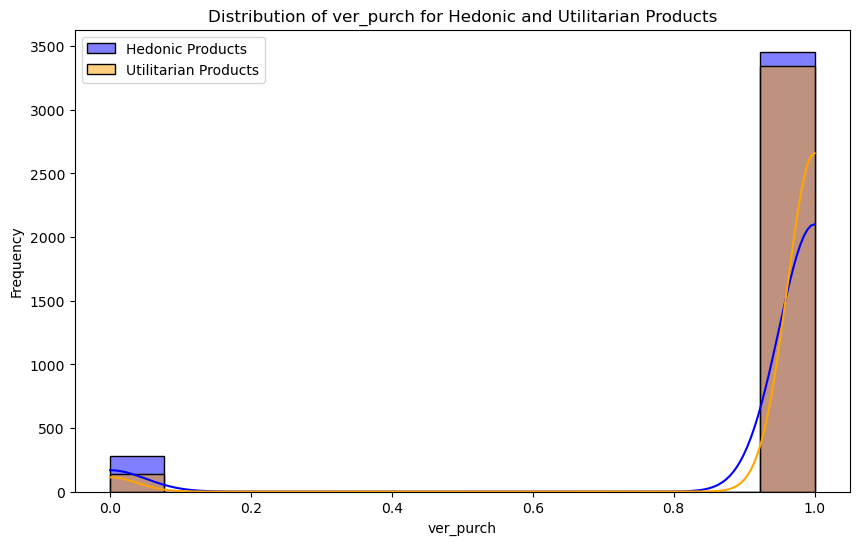

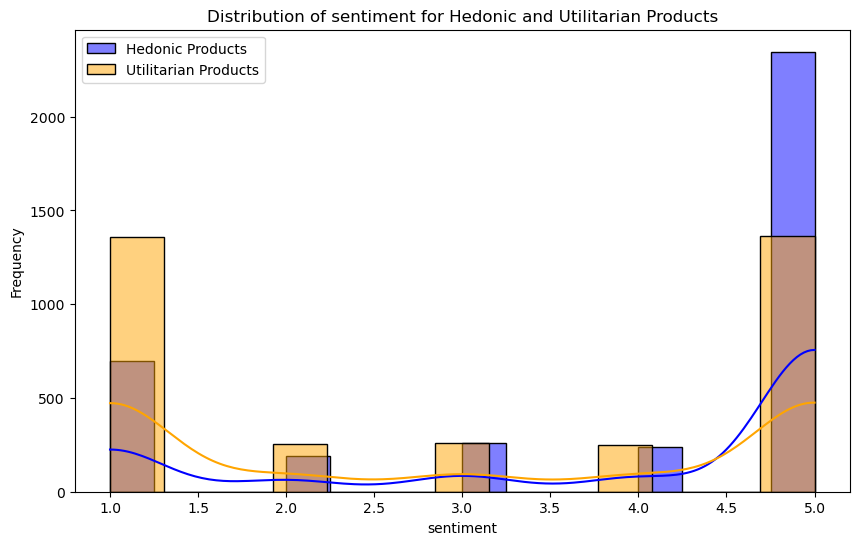

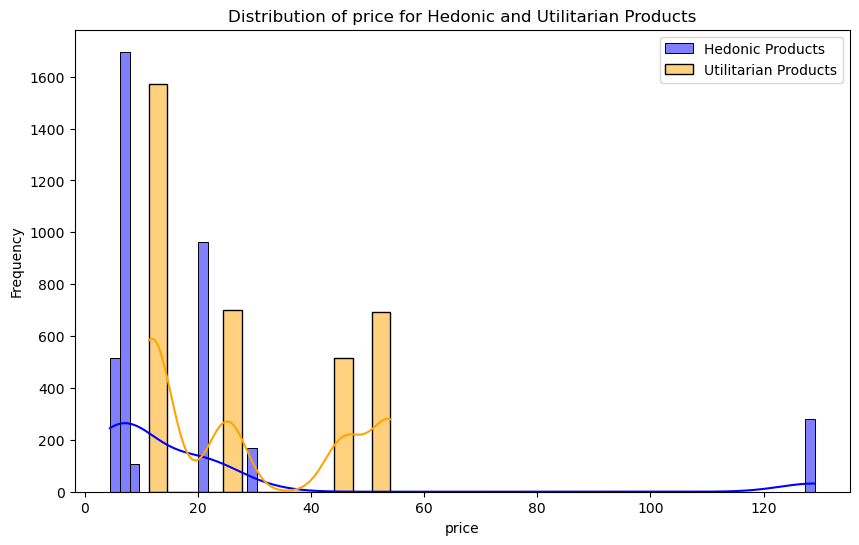

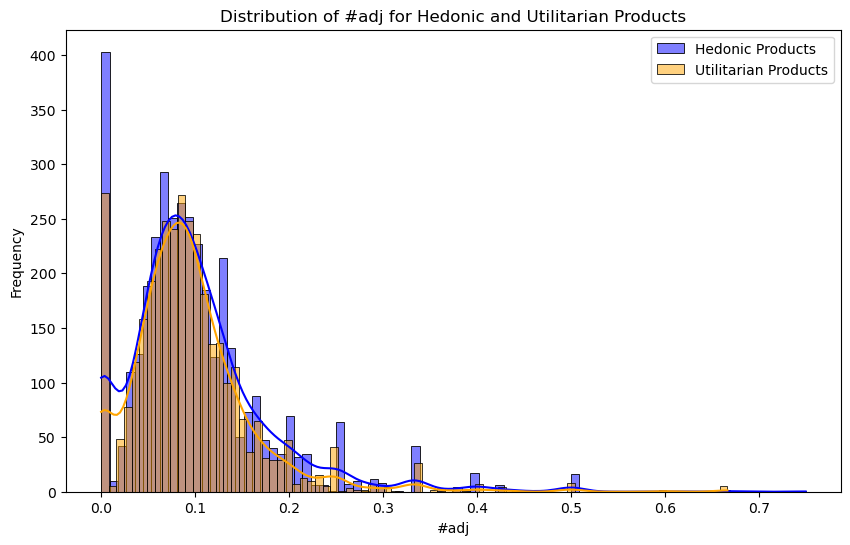

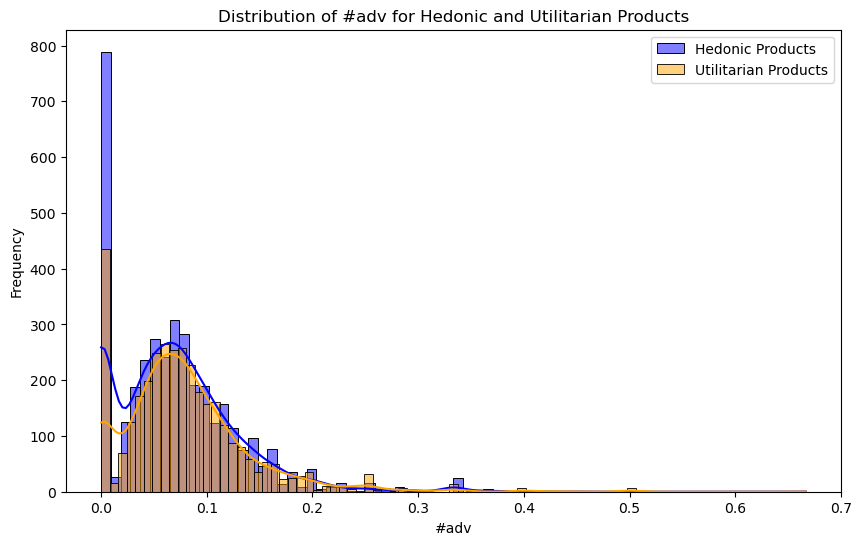

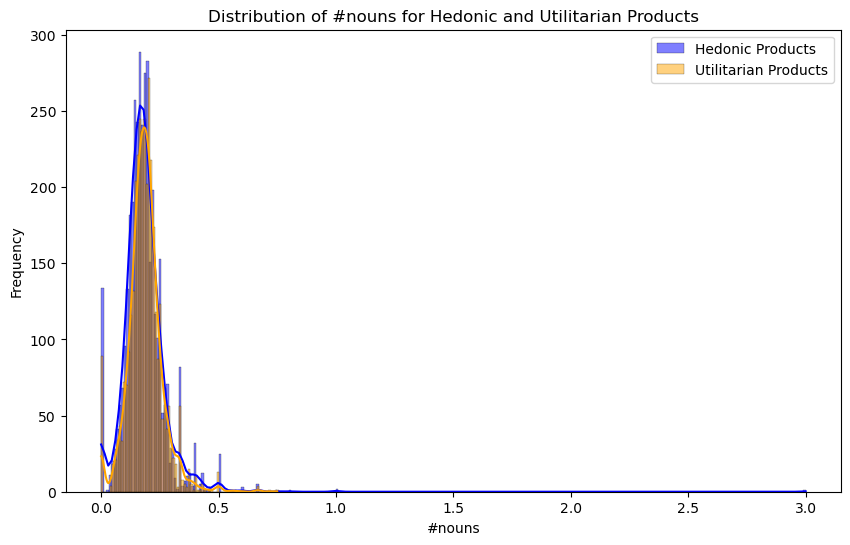

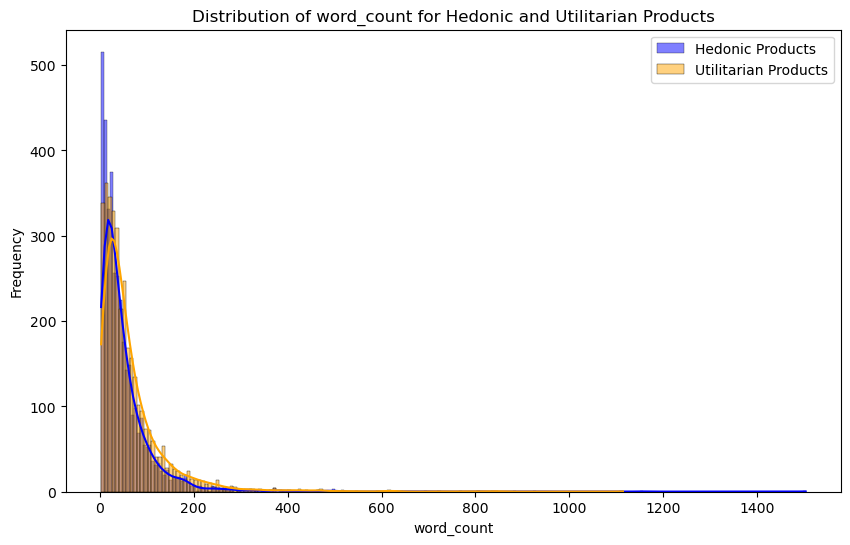

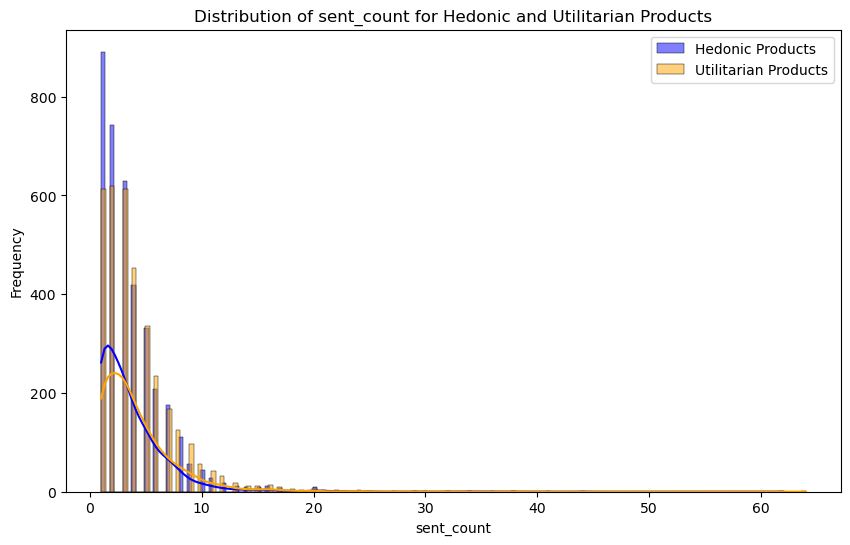

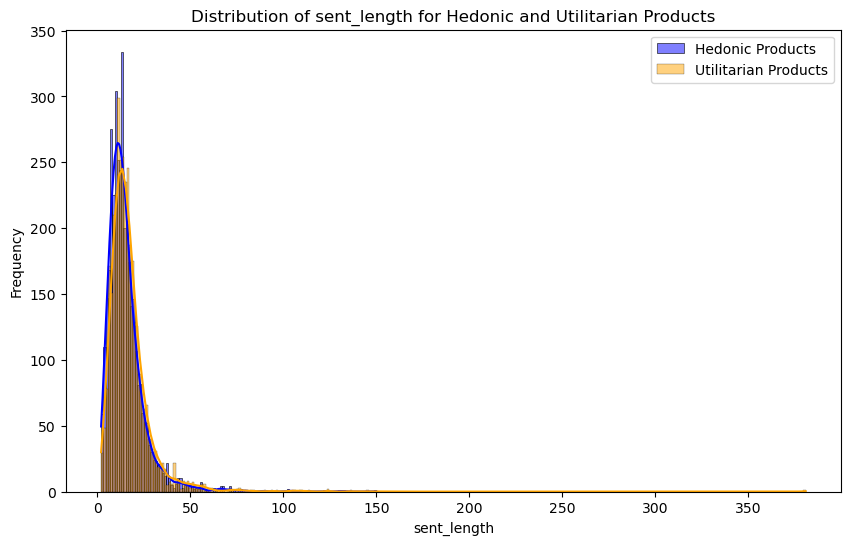

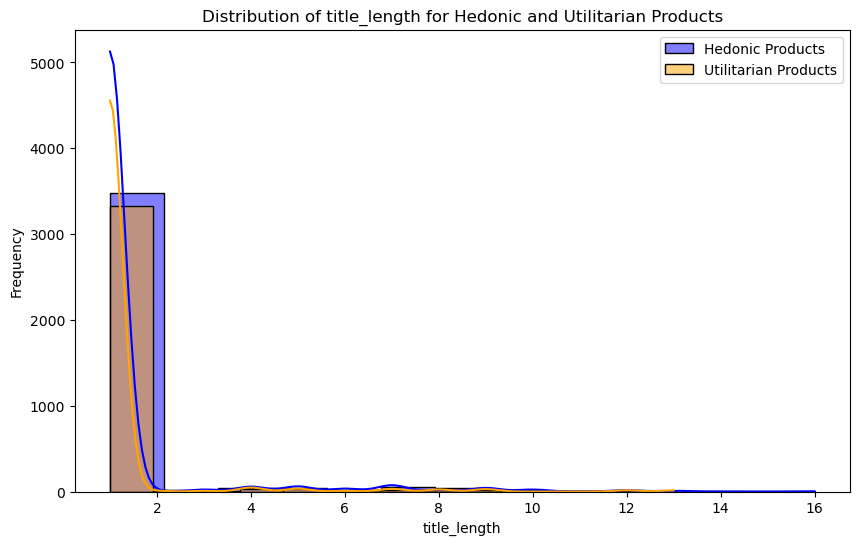

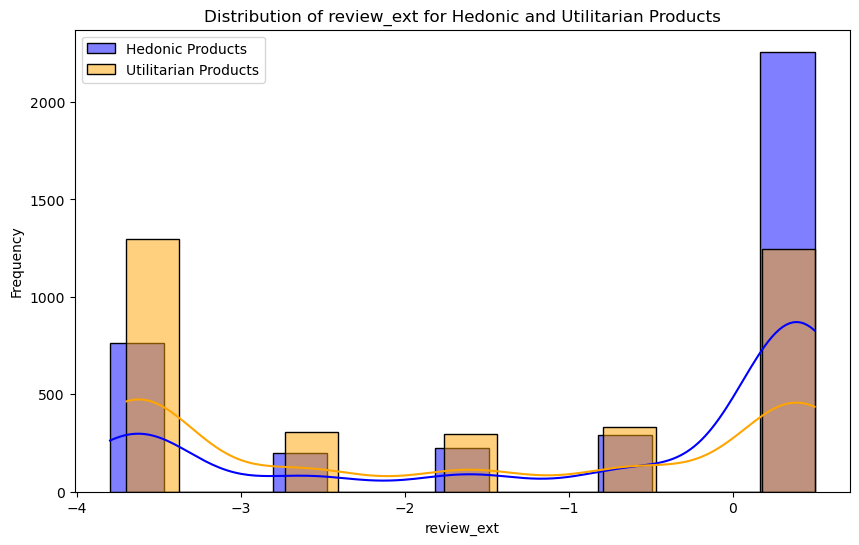

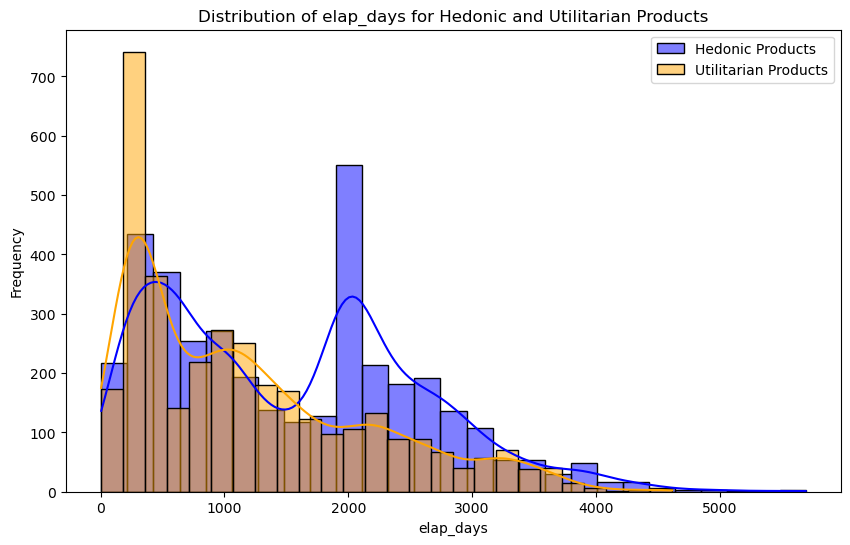

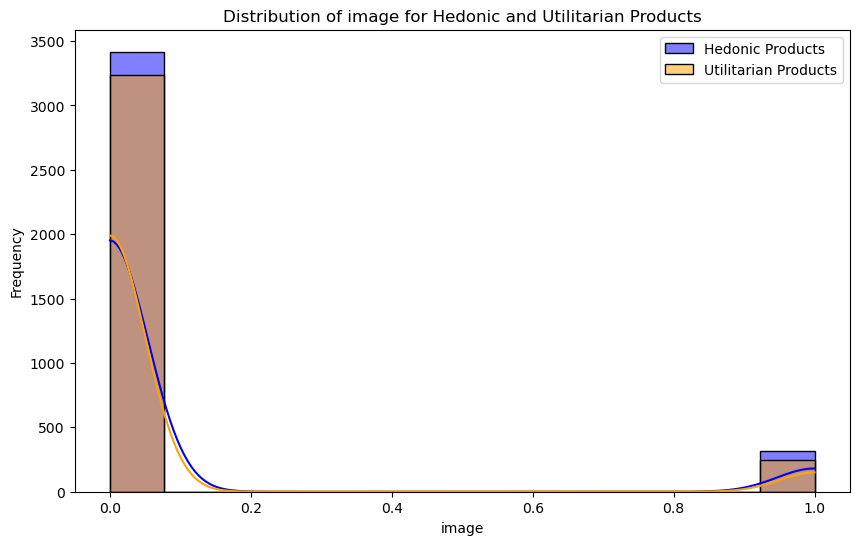

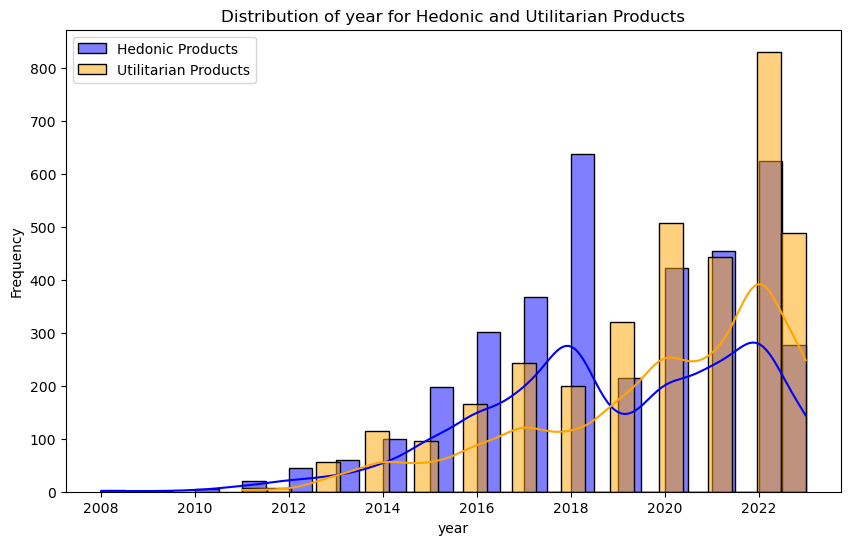

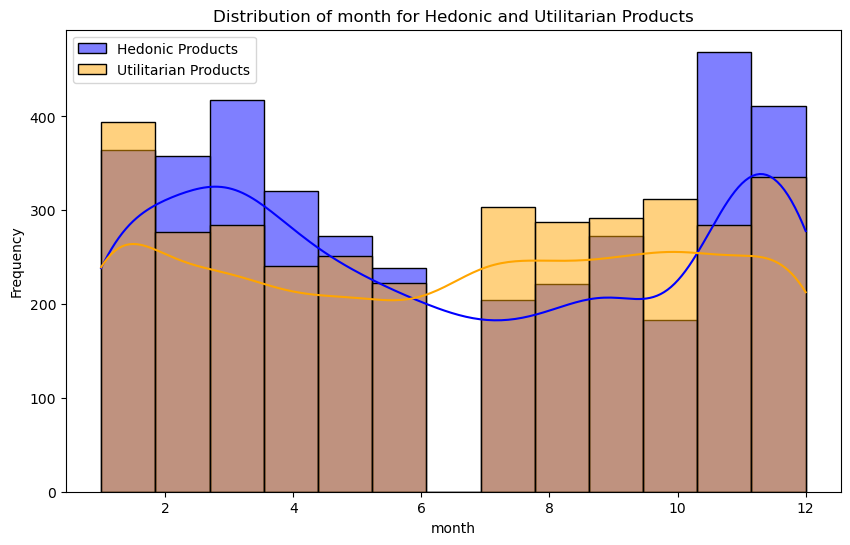

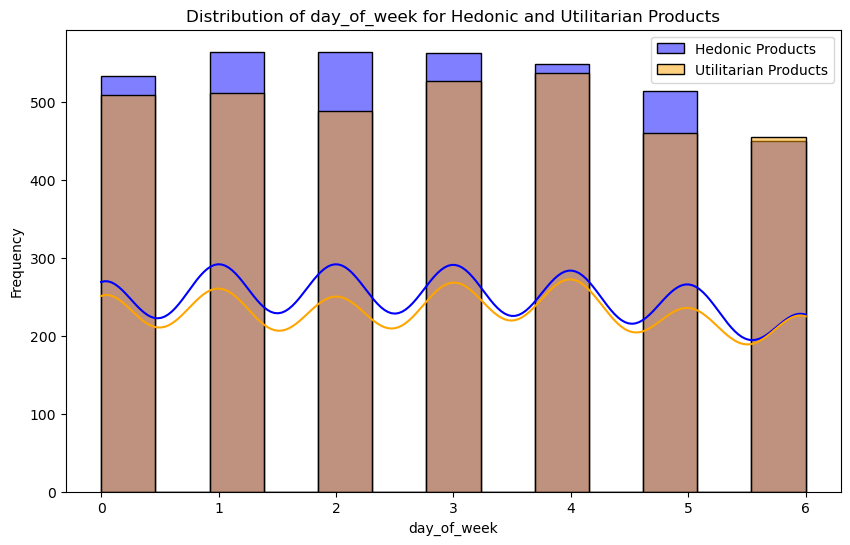

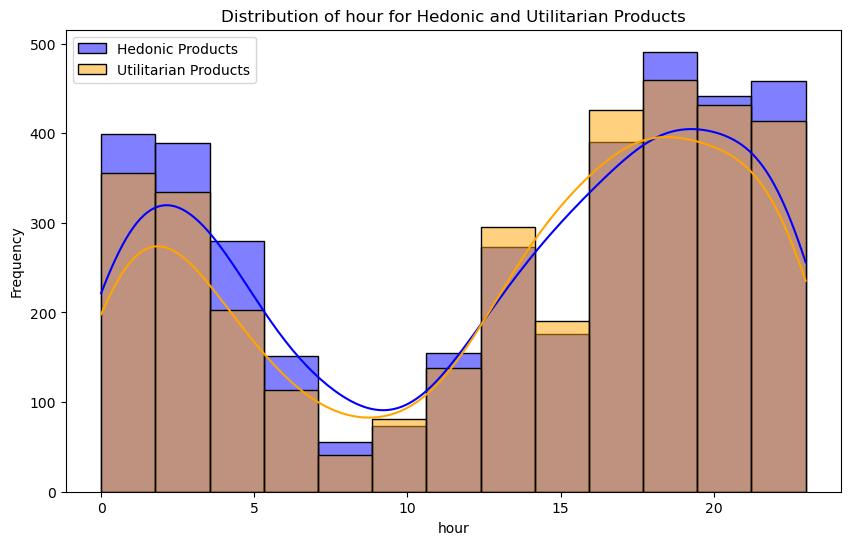

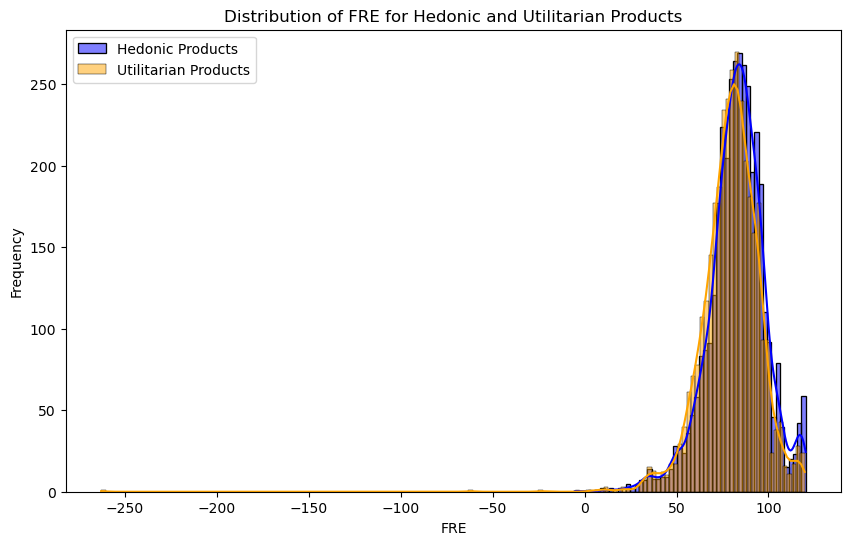

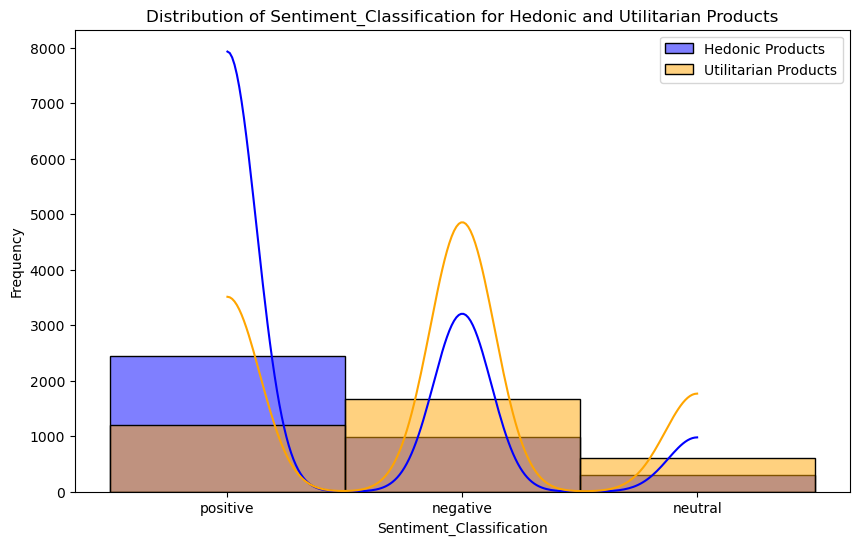

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'average_rating','rat_count','ver_purch', 'sentiment', 'price', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'year', 'month', 'day_of_week', 'hour','FRE','Sentiment_Classification'
]


# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Plot histogram for hedonic products
    sns.histplot(data_hedonic[feature], color='blue', kde=True, label='Hedonic Products')
    
    # Plot histogram for utilitarian products
    sns.histplot(data_utilitarian[feature], color='orange', kde=True, label='Utilitarian Products')
    
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The 

<Figure size 1200x600 with 0 Axes>

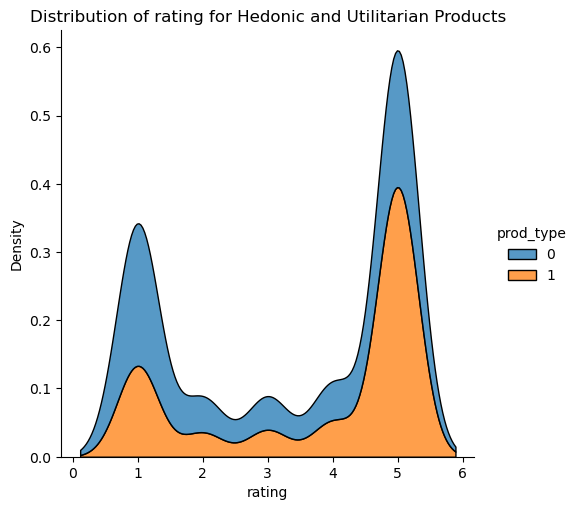

<Figure size 1200x600 with 0 Axes>

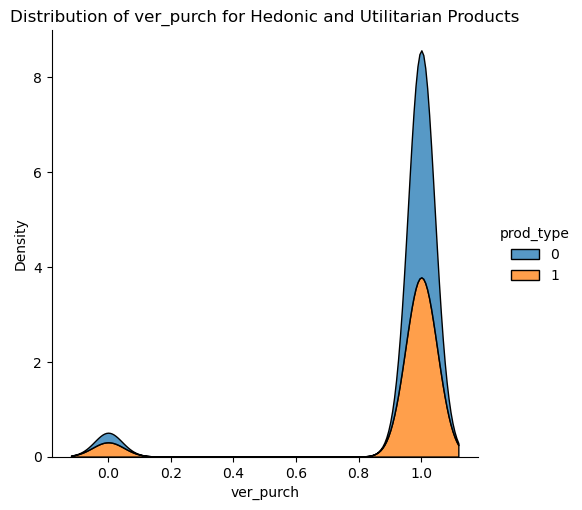

<Figure size 1200x600 with 0 Axes>

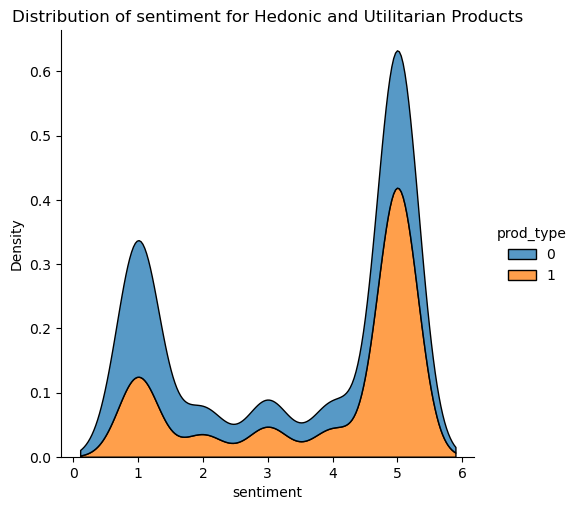

<Figure size 1200x600 with 0 Axes>

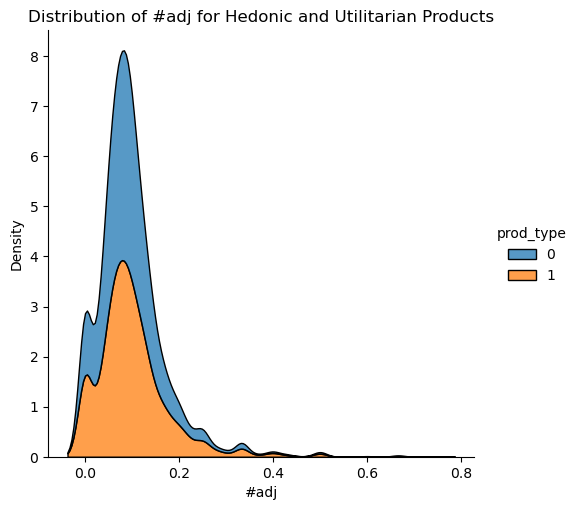

<Figure size 1200x600 with 0 Axes>

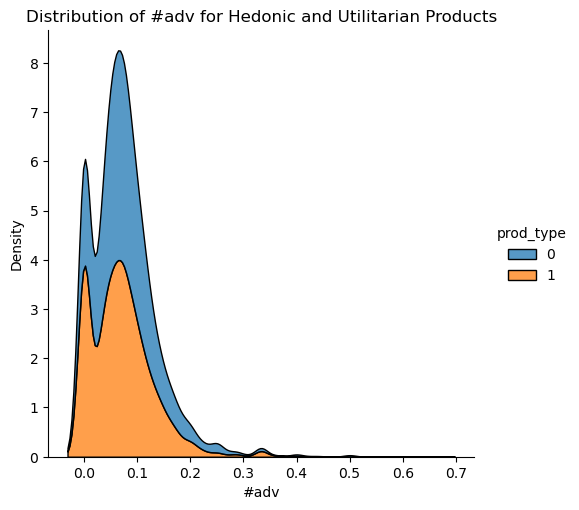

<Figure size 1200x600 with 0 Axes>

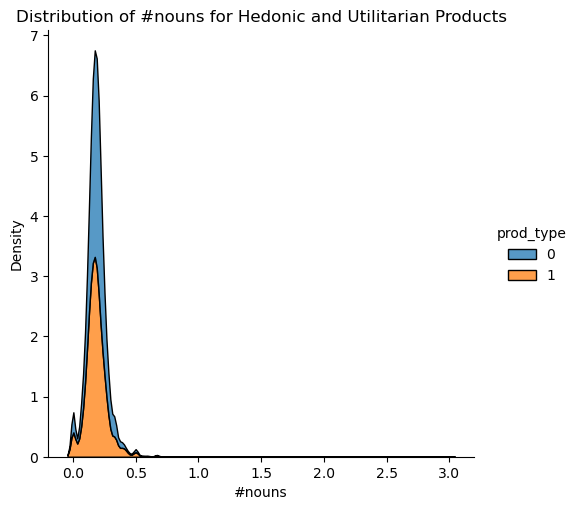

<Figure size 1200x600 with 0 Axes>

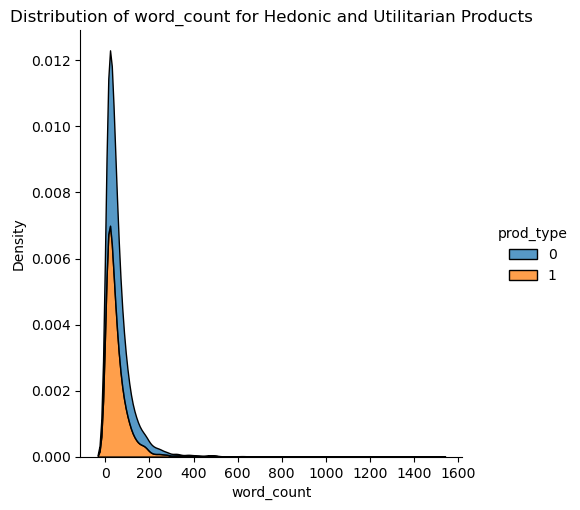

<Figure size 1200x600 with 0 Axes>

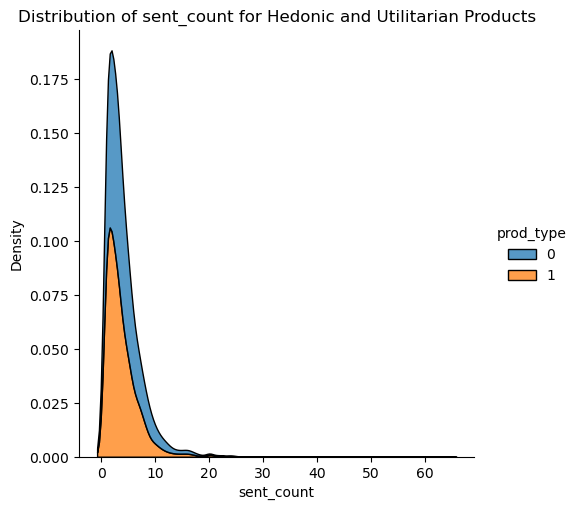

<Figure size 1200x600 with 0 Axes>

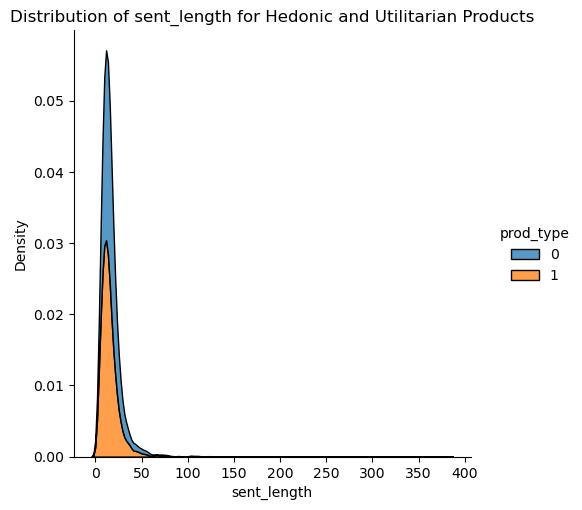

<Figure size 1200x600 with 0 Axes>

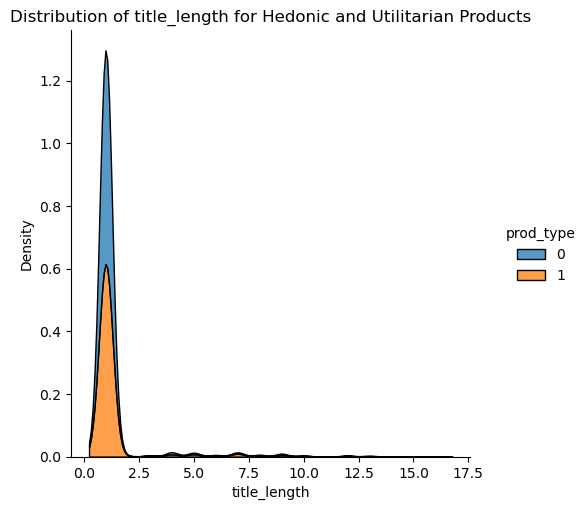

<Figure size 1200x600 with 0 Axes>

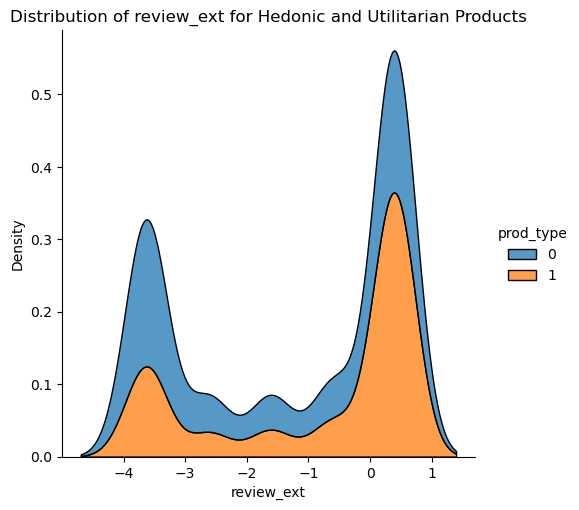

<Figure size 1200x600 with 0 Axes>

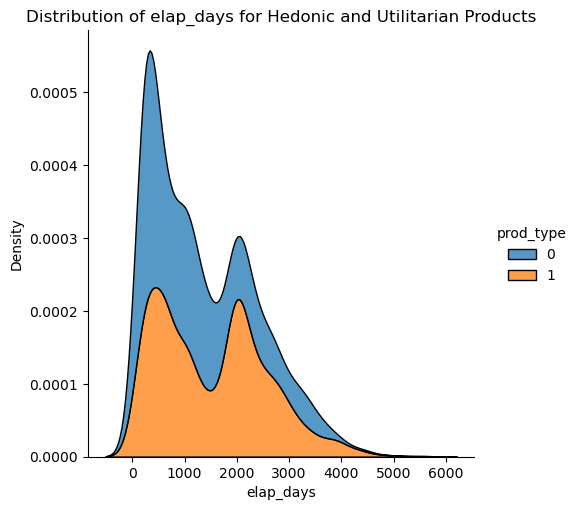

<Figure size 1200x600 with 0 Axes>

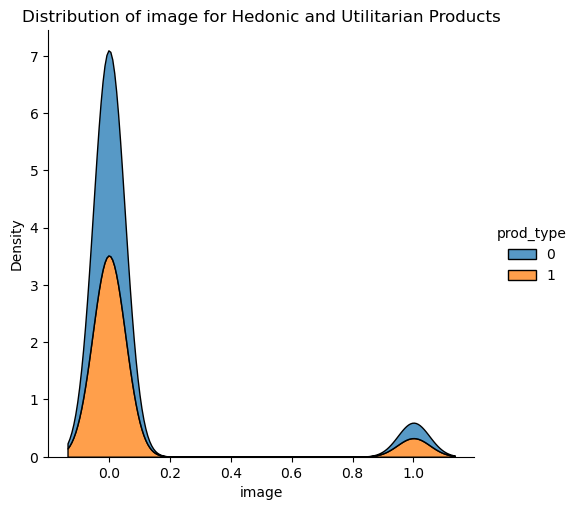

<Figure size 1200x600 with 0 Axes>

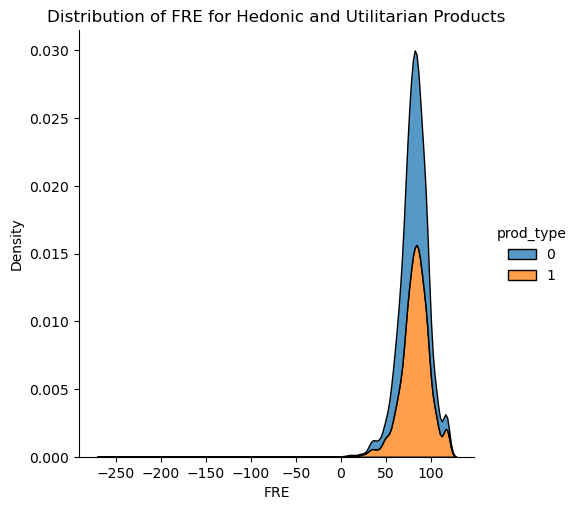

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'ver_purch', 'sentiment', '#adj', '#adv',
    '#nouns', 'word_count', 'sent_count', 'sent_length', 
    'title_length', 'review_ext', 'elap_days', 
    'image', 'FRE']

# Visualize the distribution of each feature for both hedonic and utilitarian products
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Plot histogram for hedonic and utilitarian products
    sns.displot(data=data_helpful, x=feature, hue='prod_type',multiple="stack", kind="kde")
    
    # Add titles and labels
    plt.title(f'Distribution of {feature} for Hedonic and Utilitarian Products')
    plt.xlabel(feature)
    plt.ylabel('Density')
    
    # Show the plot

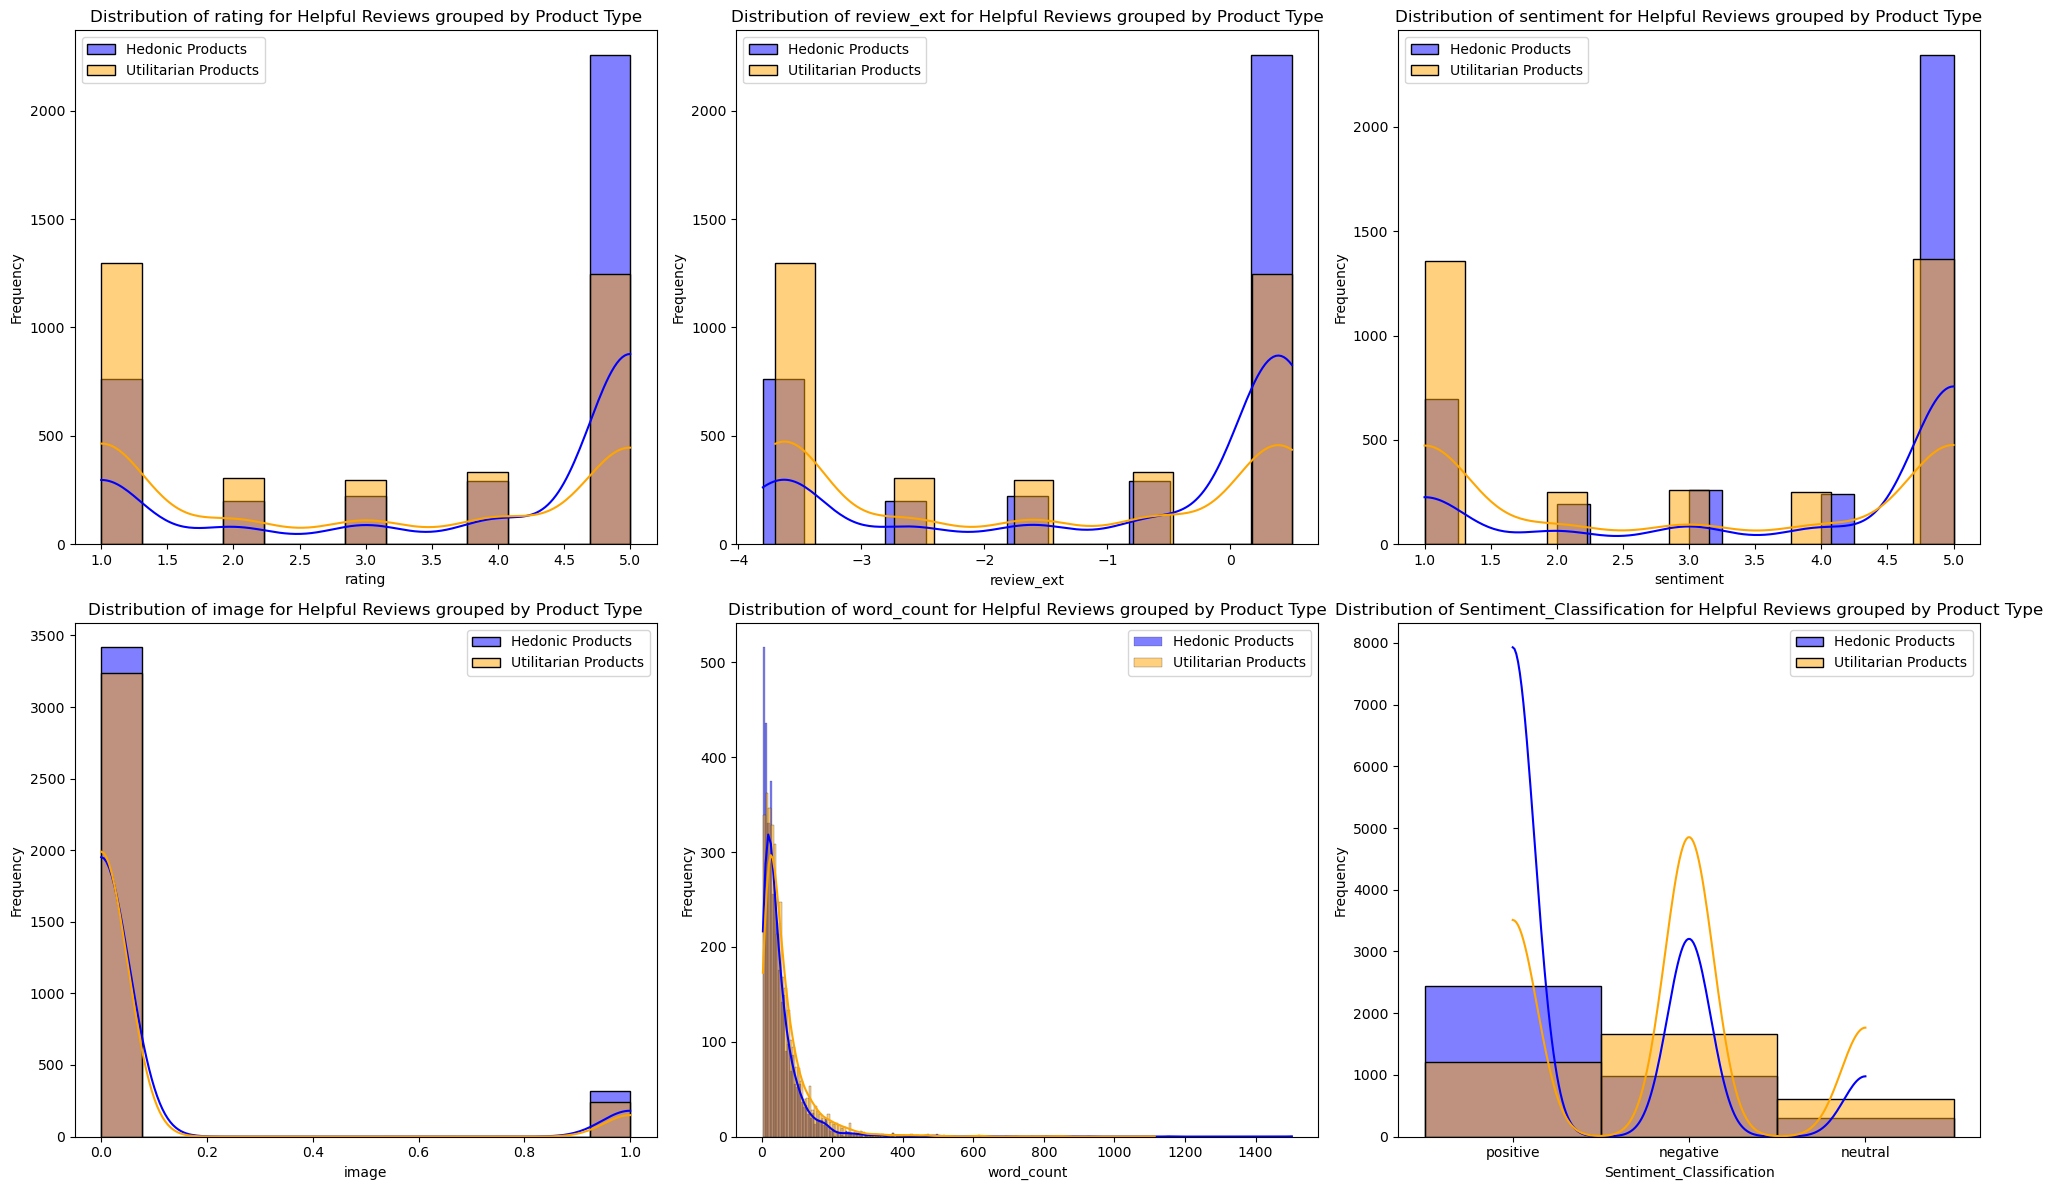

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'review_ext', 'sentiment', 'image','word_count', 'Sentiment_Classification'
]

# Set up the grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Adjust the grid size if needed
axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.histplot(data_hedonic[feature], color='blue', kde=True, label='Hedonic Products', ax=ax)
    sns.histplot(data_utilitarian[feature], color='orange', kde=True, label='Utilitarian Products', ax=ax)
    
    ax.set_title(f'Distribution of {feature} for Helpful Reviews grouped by Product Type')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()

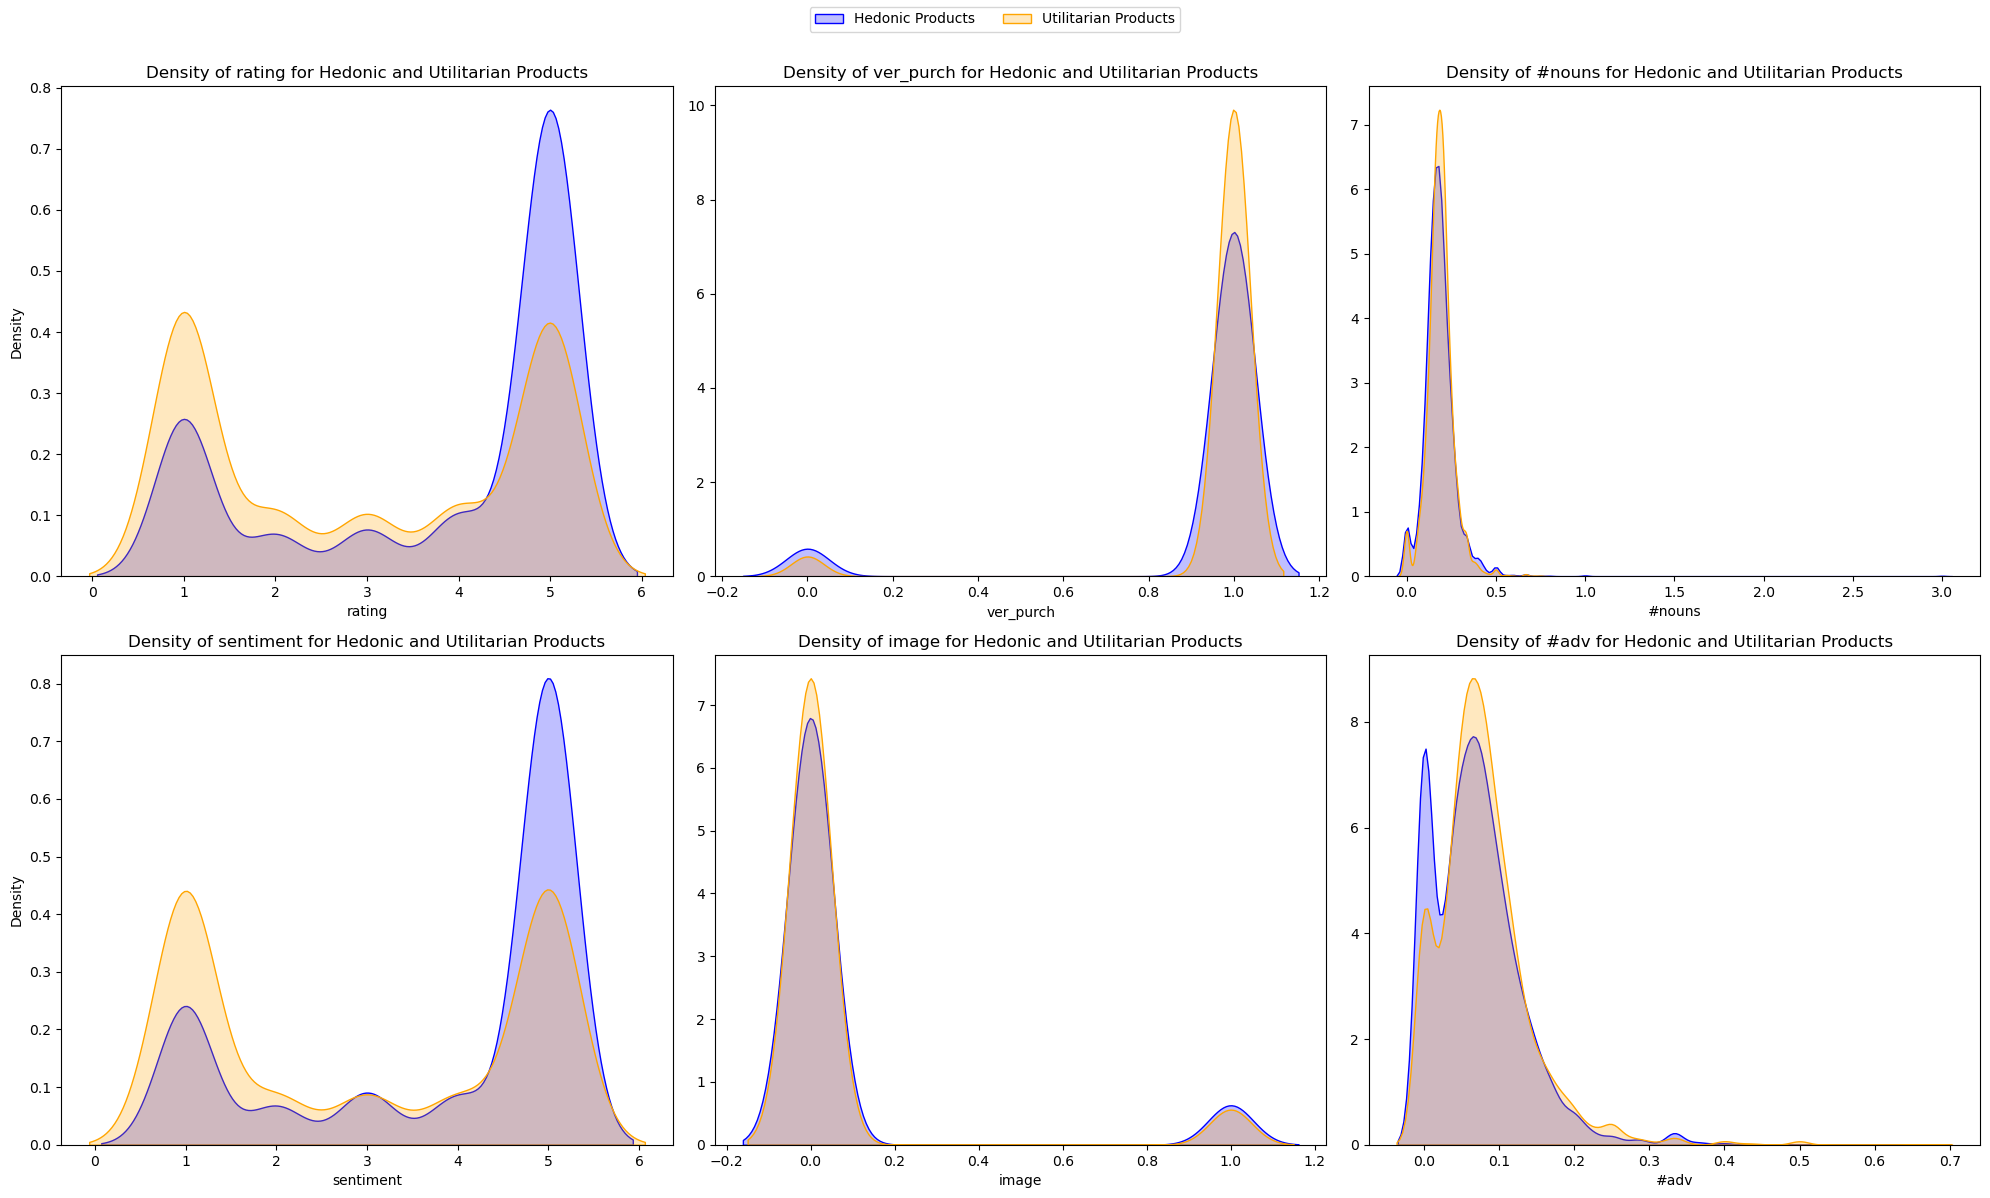

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features of interest
features = [
    'rating', 'ver_purch','#nouns', 'sentiment', 'image', '#adv',
]

# Set up the grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))  # Adjust the grid size if needed
axes = axes.flatten()

# Plot the density plots
for ax, feature in zip(axes, features):
    sns.kdeplot(data=data_hedonic[feature], color='blue', label='Hedonic Products', ax=ax, fill=True)
    sns.kdeplot(data=data_utilitarian[feature], color='orange', label='Utilitarian Products', ax=ax, fill=True)
    
    ax.set_title(f'Density of {feature} for Hedonic and Utilitarian Products')
    ax.set_xlabel(feature)
    if ax in axes[::3]:  # Label Y-axis only for the leftmost plots
        ax.set_ylabel('Density')
    else:
        ax.set_ylabel('')
    
    # Remove individual legends
    ax.legend().set_visible(False)

# Create a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to make room for the legend
plt.show()


In [28]:
# Adding the 'helpful' column to the data dictionary
data['helpful'] = [votes >= 1 for votes in data['helpful_vote']]

# Creating the DataFrame with the updated data dictionary
data = pd.DataFrame(data)


# Display the updated DataFrame
print(data)

       rating                                            title_x  \
0         5.0                                          Love this   
1         5.0  The fun games that you remember.. now on the N...   
2         5.0                                      So much fun!!   
3         5.0                              Wish this had more...   
4         5.0    It is the physical copy and it is a good price.   
...       ...                                                ...   
22086     5.0                                      Works wonders   
22087     5.0                                          Resultado   
22088     5.0                                         Amazing!!!   
22089     5.0    This brush has lifted a weight off my shoulders   
22090     5.0  Amazing! Effortlessly detangles without causin...   

                                                    text images        asin  \
0      My kids have so much fun with this game. Its a...     []  B01N1081RO   
1      These are 3 of the

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Apply log transformation to the 'word_count' column
data['log_word_count'] = np.log1p(data['word_count'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create the violin plot with log-transformed data
plt.figure(figsize=(10, 6),dpi=1000)
sns.violinplot(x="helpful_label", y="log_word_count", hue="prod_type_label", data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("log (word_count)",size=14)
plt.xlabel("")
plt.tight_layout()
plt.legend(title='Product Type', title_fontsize='14', fontsize='13')
plt.show()


In [102]:
# Apply log transformation to the 'word_count' and 'sent_length' columns
data['log_word_count'] = np.log1p(data['word_count'])
data['log_sent_length'] = np.log1p(data['sent_length'])

# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Map helpful to descriptive labels
data['helpful_label'] = data['helpful'].map({True: 'Helpful Review', False: 'Unhelpful Review'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5),dpi=1000)

# Plot violin plot for log-transformed word_count
sns.violinplot(ax=axes[0], x="helpful_label", y="log_word_count", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[0].set_ylabel("log (word_count)", size=13)
axes[0].set_xlabel("")
axes[0].legend_.remove()  # Remove legend from the first plot

# Increase the font size of the x-axis and y-axis labels in the left plot
axes[0].tick_params(axis='x', labelsize=14)
axes[0].tick_params(axis='y', labelsize=13)

# Plot violin plot for log-transformed sent_length
sns.violinplot(ax=axes[1], x="helpful_label", y="log_sent_length", hue="prod_type_label",
               data=data, split=False, inner="box", palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})
axes[1].set_ylabel("log (sent_length)", size=14)
axes[1].set_xlabel("")

axes[1].tick_params(axis='x', labelsize=14)
axes[1].tick_params(axis='y', labelsize=13)

# Add a big legend inside the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Product Type', title_fontsize='14', fontsize='14', loc='upper right', frameon=True)

plt.tight_layout()
plt.show()


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_10202/893593982.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="prod_type", y="helpful_ratio", data=data_helpful, palette={"0": "steelblue", "1": "sandybrown"})


<Axes: xlabel='prod_type', ylabel='helpful_ratio'>

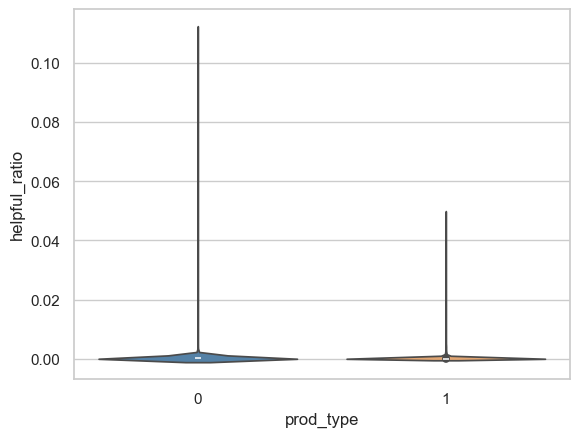

In [108]:
sns.violinplot(x="prod_type", y="helpful_ratio", data=data_helpful, palette={"0": "steelblue", "1": "sandybrown"})

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_10202/1963201559.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})


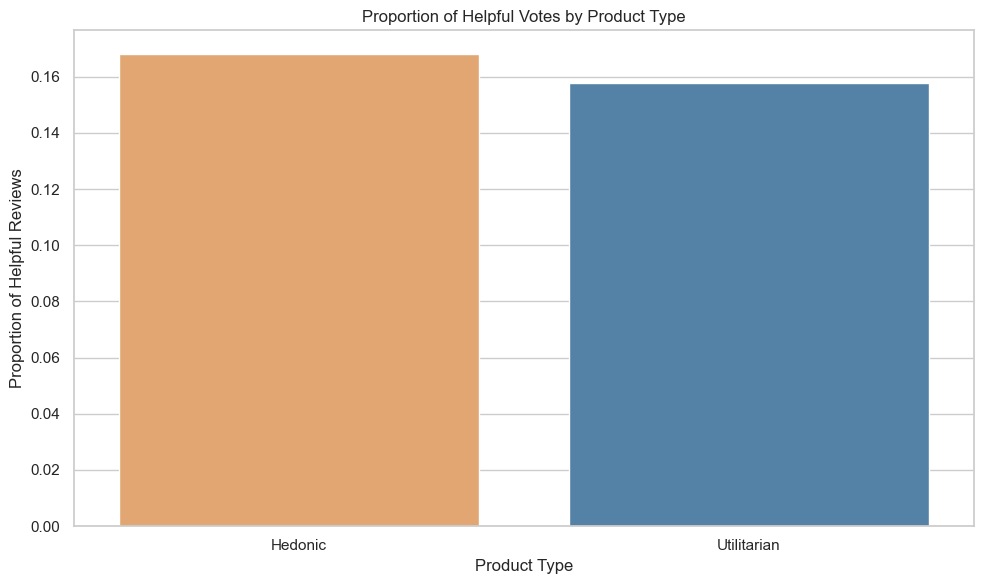

In [117]:
# Map product types to labels
data['prod_type_label'] = data['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})
data['helpful_label'] = data['helpful'].map({True: 'Helpful', False: 'Not Helpful'})

# Calculate the proportion of helpful reviews for each product type
helpful_proportion = data.groupby('prod_type_label')['helpful'].mean().reset_index()

# Set the theme
sns.set_theme(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='prod_type_label', y='helpful', data=helpful_proportion, palette={"Utilitarian": "steelblue", "Hedonic": "sandybrown"})

# Adjust the layout and display the plot
plt.ylabel("Proportion of Helpful Reviews")
plt.xlabel("Product Type")
plt.title("Proportion of Helpful Votes by Product Type")
plt.tight_layout()
plt.show()

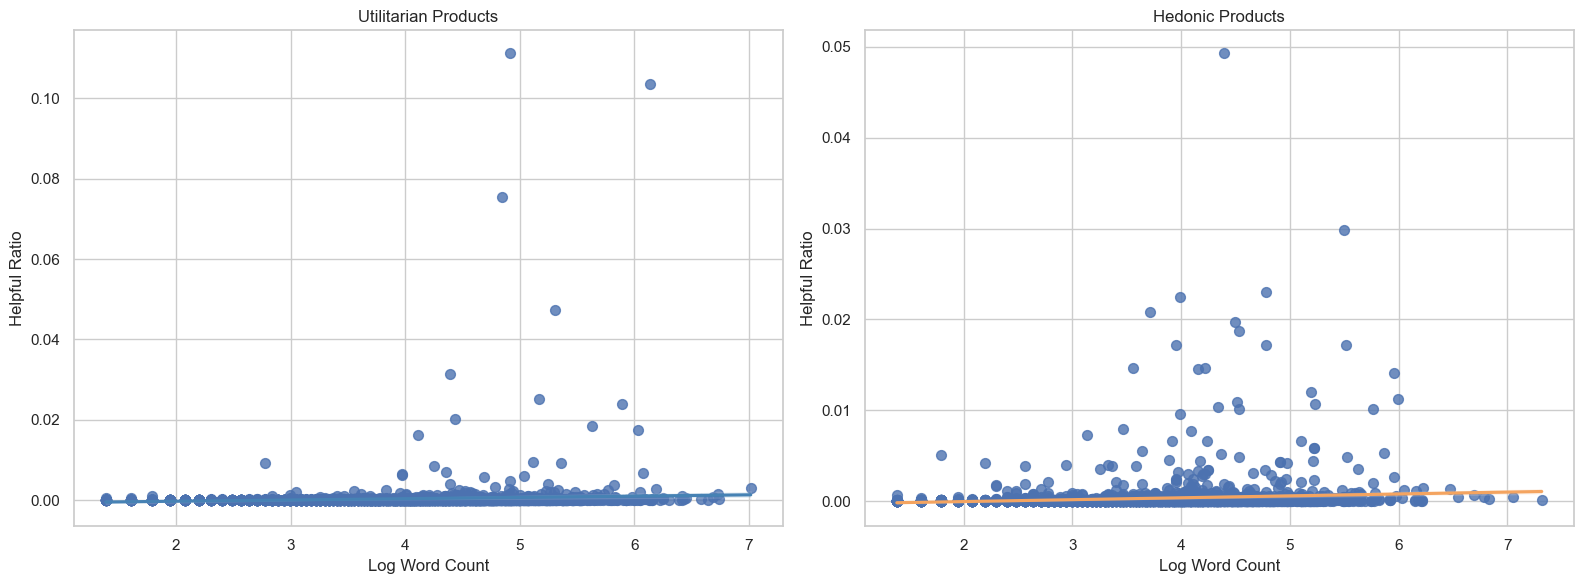

In [119]:
# Log-transform the word_count
data_helpful['log_word_count'] = np.log1p(data_helpful['word_count'])

# Map product types to labels
data_helpful['prod_type_label'] = data_helpful['prod_type'].map({0: 'Utilitarian', 1: 'Hedonic'})

# Set the theme
sns.set_theme(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot with regression line for Utilitarian products
sns.regplot(ax=axes[0], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 0], scatter_kws={'s': 50}, line_kws={'color': 'steelblue'})
axes[0].set_title('Utilitarian Products')
axes[0].set_xlabel('Log Word Count')
axes[0].set_ylabel('Helpful Ratio')

# Scatter plot with regression line for Hedonic products
sns.regplot(ax=axes[1], x='log_word_count', y='helpful_ratio', data=data_helpful[data_helpful['prod_type'] == 1], scatter_kws={'s': 50}, line_kws={'color': 'sandybrown'})
axes[1].set_title('Hedonic Products')
axes[1].set_xlabel('Log Word Count')
axes[1].set_ylabel('Helpful Ratio')

plt.tight_layout()
plt.show()

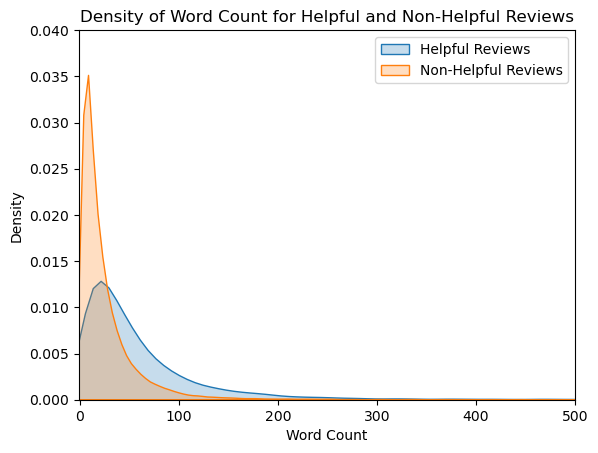

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for helpful reviews with more than 1 helpful vote
helpful_reviews = data[data['helpful_vote'] > 0]

# Filter data for non-helpful reviews
non_helpful_reviews = data[data['helpful_vote'] < 1]

# Plot density of word count for helpful and non-helpful reviews
sns.kdeplot(data=helpful_reviews['word_count'], label='Helpful Reviews', fill=True)
sns.kdeplot(data=non_helpful_reviews['word_count'], label='Non-Helpful Reviews', fill=True)

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.title('Density of Word Count for Helpful and Non-Helpful Reviews')

# Set y-axis limits
plt.ylim(0, 0.04)  # Adjust the range as needed
plt.xlim(-0.5, 500)  # Adjust the range as needed

# Show legend
plt.legend()

# Show plot
plt.show()

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_7608/282419235.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=combined_reviews[combined_reviews['Review_Type'] == 'Helpful'], x='Normalized_Word_Count', label='Helpful Reviews', color='blue', shade=True)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_7608/282419235.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=combined_utilitarian_reviews[combined_utilitarian_reviews['Review_Type'] == 'Helpful'], x='Normalized_Word_Count', label='Helpful Utilitarian Reviews', color='green', shade=True)


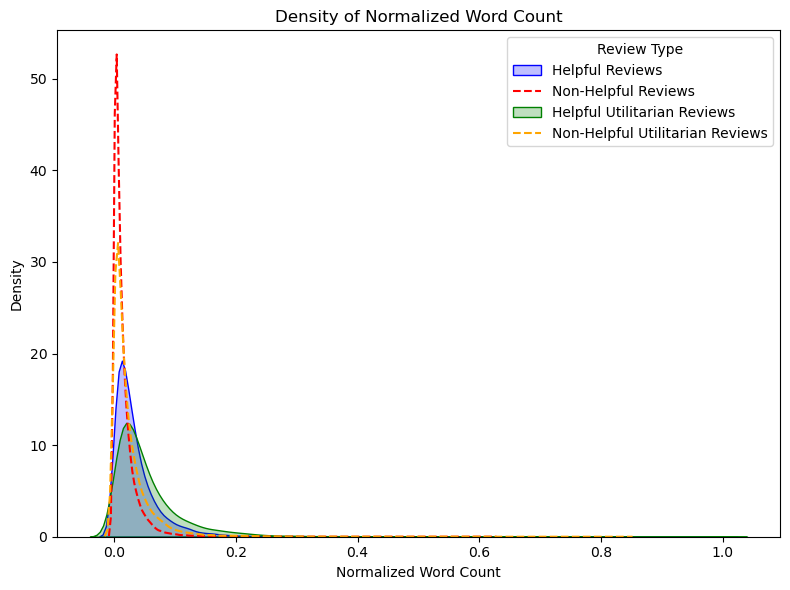

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Normalize the word count data for helpful and non-helpful reviews
word_count_helpful_normalized = scaler.fit_transform(data[data['helpful_vote'] > 0]['word_count'].values.reshape(-1, 1))
word_count_non_helpful_normalized = scaler.transform(data[data['helpful_vote'] <= 0]['word_count'].values.reshape(-1, 1))

# Normalize the word count data for utilitarian products - helpful and non-helpful reviews
word_count_utilitarian_helpful_normalized = scaler.fit_transform(data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] > 0]['word_count'].values.reshape(-1, 1))
word_count_utilitarian_non_helpful_normalized = scaler.transform(data_utilitarian_raw[data_utilitarian_raw['helpful_vote'] <= 0]['word_count'].values.reshape(-1, 1))

# Create DataFrame for helpful and non-helpful reviews
helpful_reviews = pd.DataFrame({'Normalized_Word_Count': word_count_helpful_normalized.flatten(), 'Review_Type': 'Helpful'})
non_helpful_reviews = pd.DataFrame({'Normalized_Word_Count': word_count_non_helpful_normalized.flatten(), 'Review_Type': 'Non-Helpful'})
combined_reviews = pd.concat([helpful_reviews, non_helpful_reviews])

# Create DataFrame for utilitarian products - helpful and non-helpful reviews
utilitarian_helpful_reviews = pd.DataFrame({'Normalized_Word_Count': word_count_utilitarian_helpful_normalized.flatten(), 'Review_Type': 'Helpful'})
utilitarian_non_helpful_reviews = pd.DataFrame({'Normalized_Word_Count': word_count_utilitarian_non_helpful_normalized.flatten(), 'Review_Type': 'Non-Helpful'})
combined_utilitarian_reviews = pd.concat([utilitarian_helpful_reviews, utilitarian_non_helpful_reviews])

# Plot overall density of normalized word count for helpful and non-helpful reviews, and for utilitarian products
plt.figure(figsize=(8, 6))
sns.kdeplot(data=combined_reviews[combined_reviews['Review_Type'] == 'Helpful'], x='Normalized_Word_Count', label='Helpful Reviews', color='blue', shade=True)
sns.kdeplot(data=combined_reviews[combined_reviews['Review_Type'] == 'Non-Helpful'], x='Normalized_Word_Count', label='Non-Helpful Reviews', color='red', linestyle='--')
sns.kdeplot(data=combined_utilitarian_reviews[combined_utilitarian_reviews['Review_Type'] == 'Helpful'], x='Normalized_Word_Count', label='Helpful Utilitarian Reviews', color='green', shade=True)
sns.kdeplot(data=combined_utilitarian_reviews[combined_utilitarian_reviews['Review_Type'] == 'Non-Helpful'], x='Normalized_Word_Count', label='Non-Helpful Utilitarian Reviews', color='orange', linestyle='--')
plt.xlabel('Normalized Word Count')
plt.ylabel('Density')
plt.title('Density of Normalized Word Count')
plt.legend(title='Review Type')

# Show plot
plt.tight_layout()
plt.show()


## Analyzing n_Grams by sentiment 

In [ ]:
word_counts = {}
for text in data_hedonic['text_cleaned1']:
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()  # Split the text into words
        for word in words:
            if word in word_counts:
                word_counts[word] += 1
            else:
                word_counts[word] = 1



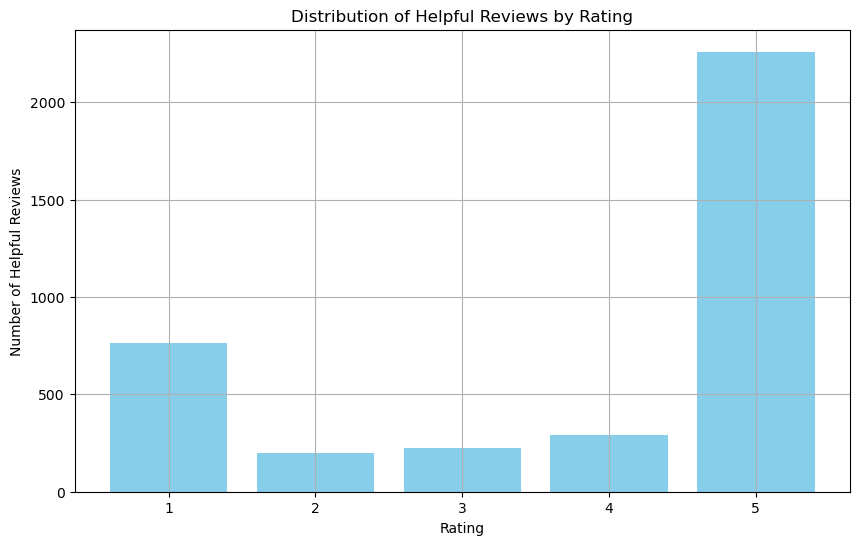

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate counts for each rating with at least 1 helpful vote
helpful_reviews_count_by_rating = data_hedonic['rating'][data_hedonic['helpful_vote'] > 0].value_counts()

# Plot a bar chart to visualize the distribution of helpful reviews by rating
plt.figure(figsize=(10, 6))
plt.bar(helpful_reviews_count_by_rating.index, helpful_reviews_count_by_rating.values, color='skyblue')
plt.title('Distribution of Helpful Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Helpful Reviews')
plt.xticks(helpful_reviews_count_by_rating.index)  # Ensure all ratings are displayed on x-axis
plt.grid(True)
plt.show()


In [ ]:
word_counts_positive = {}
word_counts_negative = {}
word_counts_neutral = {}

for index, row in data_hedonic.iterrows():
    text = row['text_cleaned1']
    sentiment = row['Sentiment_Classification']
    
    if isinstance(text, str):  # Check if the value is a string
        words = text.split()  # Split the text into words
        
        # Count words based on sentiment classification
        if sentiment == 'positive':
            for word in words:
                if word in word_counts_positive:
                    word_counts_positive[word] += 1
                else:
                    word_counts_positive[word] = 1
        elif sentiment == 'negative':
            for word in words:
                if word in word_counts_negative:
                    word_counts_negative[word] += 1
                else:
                    word_counts_negative[word] = 1
        elif sentiment == 'neutral':
            for word in words:
                if word in word_counts_neutral:
                    word_counts_neutral[word] += 1
                else:
                    word_counts_neutral[word] = 1


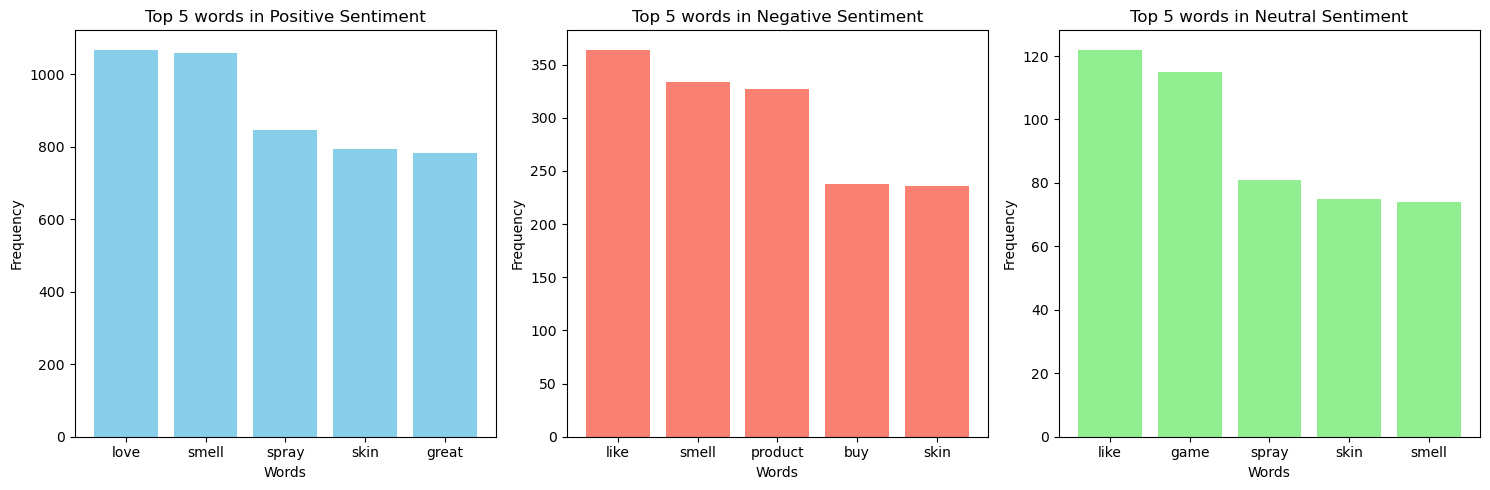

In [ ]:
import matplotlib.pyplot as plt

# Sort the word counts for each sentiment category
top_words_positive = sorted(word_counts_positive.items(), key=lambda x: x[1], reverse=True)[:5]
top_words_negative = sorted(word_counts_negative.items(), key=lambda x: x[1], reverse=True)[:5]
top_words_neutral = sorted(word_counts_neutral.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract words and counts for plotting
words_positive, counts_positive = zip(*top_words_positive)
words_negative, counts_negative = zip(*top_words_negative)
words_neutral, counts_neutral = zip(*top_words_neutral)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.bar(words_positive, counts_positive, color='skyblue')
plt.title('Top 5 words in Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(words_negative, counts_negative, color='salmon')
plt.title('Top 5 words in Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(words_neutral, counts_neutral, color='lightgreen')
plt.title('Top 5 words in Neutral Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
def classify_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score <= 2:
        return 'negative'
    else:
        return 'neutral'

# Apply the classification function to the sentiment column
data['Sentiment_Classification2'] = data['sentiment'].apply(classify_sentiment)


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

def plot_top_bigrams_by_product(data, text_column, sentiment_column, product_column):
    unique_products = data[product_column].unique()
    
    for product in unique_products:
        # Filter data for the current product
        product_data = data[data[product_column] == product]
        
        # Drop rows with missing values in the text column
        product_data = product_data.dropna(subset=[text_column])

        # Initialize CountVectorizer for bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))

        # Fit and transform the review text data
        X = vectorizer.fit_transform(product_data[text_column])

        # Get feature names (bigrams)
        feature_names = vectorizer.get_feature_names_out()

        # Initialize bigram counts for each sentiment category
        bigram_counts = defaultdict(lambda: defaultdict(int))

        # Iterate over each review text for the current product
        for index, sentiment in enumerate(product_data[sentiment_column]):
            # Get the indices of bigrams in the current review
            bigram_indices = X[index].indices
            # Increment bigram counts for the corresponding sentiment
            for bigram_index in bigram_indices:
                bigram_counts[sentiment][feature_names[bigram_index]] += 1

        # Sort the bigram counts for each sentiment category
        top_bigrams_by_sentiment = {}
        for sentiment, counts in bigram_counts.items():
            top_bigrams_by_sentiment[sentiment] = sorted(counts.items(), key=lambda x: x[1], reverse=True)[:3]

        # Plotting
        plt.figure(figsize=(15, 5))
        for i, (sentiment, top_bigrams) in enumerate(top_bigrams_by_sentiment.items()):
            bigrams, counts = zip(*top_bigrams)

            plt.subplot(1, 3, i+1)
            plt.bar(bigrams, counts, color='skyblue' if sentiment == 'positive' else 'salmon' if sentiment == 'negative' else 'lightgreen')
            plt.title(f'Top 5 bigrams in {sentiment.capitalize()} Sentiment for {product}')
            plt.xlabel('Bigrams')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

def plot_top_bigrams_by_product(data, text_column, sentiment_column, product_column):
    unique_products = data[product_column].unique()
    
    for product in unique_products:
        # Filter data for the current product
        product_data = data[data[product_column] == product]
        
        # Drop rows with missing values in the text column
        product_data = product_data.dropna(subset=[text_column])

        # Initialize CountVectorizer for bigrams
        vectorizer = CountVectorizer(ngram_range=(2, 2))

        # Fit and transform the review text data
        X = vectorizer.fit_transform(product_data[text_column])

        # Get feature names (bigrams)
        feature_names = vectorizer.get_feature_names_out()

        # Initialize bigram counts for each sentiment category
        bigram_counts = defaultdict(lambda: defaultdict(int))

        # Iterate over each review text for the current product
        for index, sentiment in enumerate(product_data[sentiment_column]):
            # Get the indices of bigrams in the current review
            bigram_indices = X[index].indices
            # Increment bigram counts for the corresponding sentiment
            for bigram_index in bigram_indices:
                bigram_counts[sentiment][feature_names[bigram_index]] += 1

        # Sort the bigram counts for each sentiment category
        top_bigrams_by_sentiment = {}
        for sentiment, counts in bigram_counts.items():
            # Sort bigrams by count
            sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True)
            # Select the fourth, fifth, and sixth most frequent bigrams
            top_bigrams_by_sentiment[sentiment] = sorted_counts[3:6]

        # Plotting
        plt.figure(figsize=(15, 5))
        for i, (sentiment, top_bigrams) in enumerate(top_bigrams_by_sentiment.items()):
            bigrams, counts = zip(*top_bigrams)

            plt.subplot(1, 3, i+1)
            plt.bar(bigrams, counts, color='skyblue' if sentiment == 'positive' else 'salmon' if sentiment == 'negative' else 'lightgreen')
            plt.title(f'Most frequent bigrams {sentiment.capitalize()} Sentiment for {product}')
            plt.xlabel('Bigrams')
            plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()



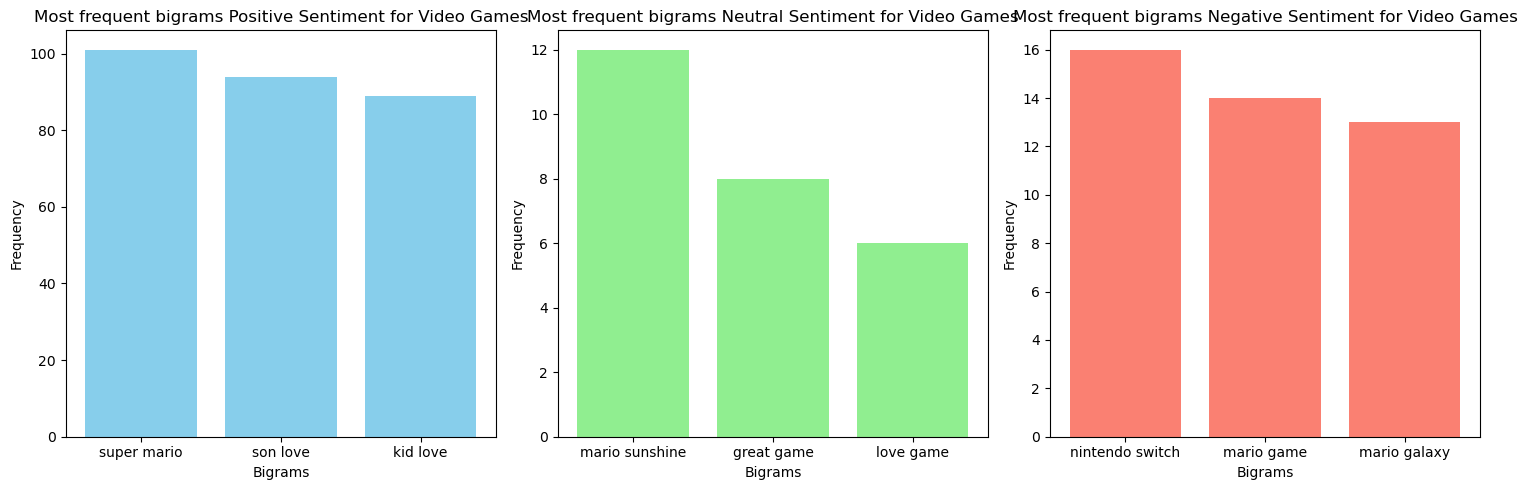

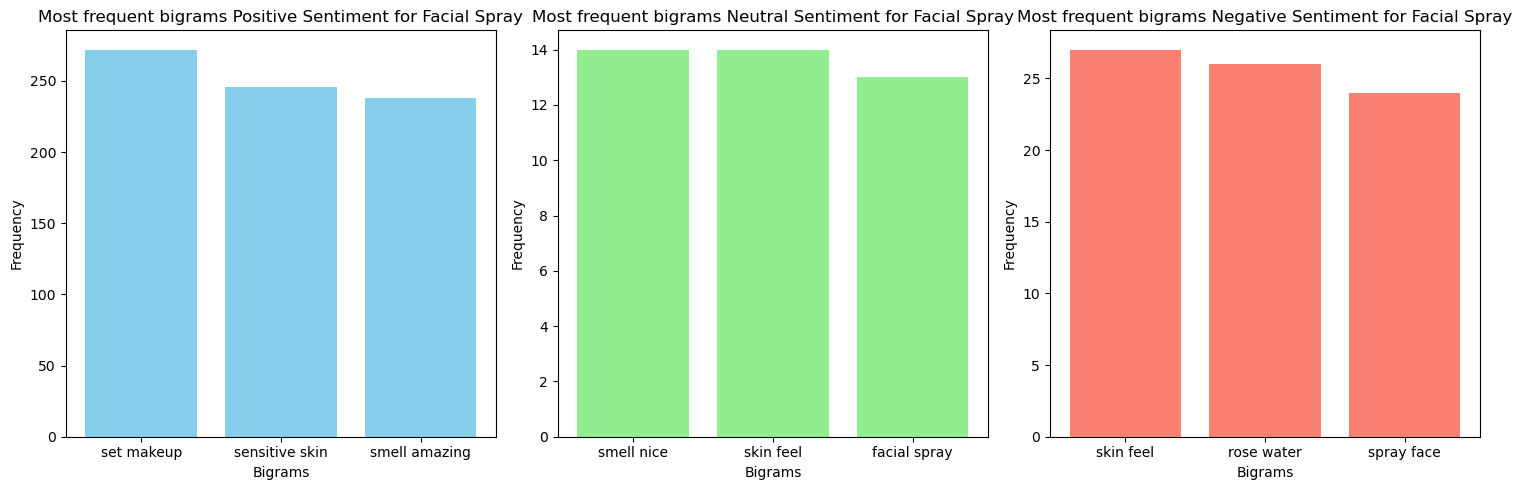

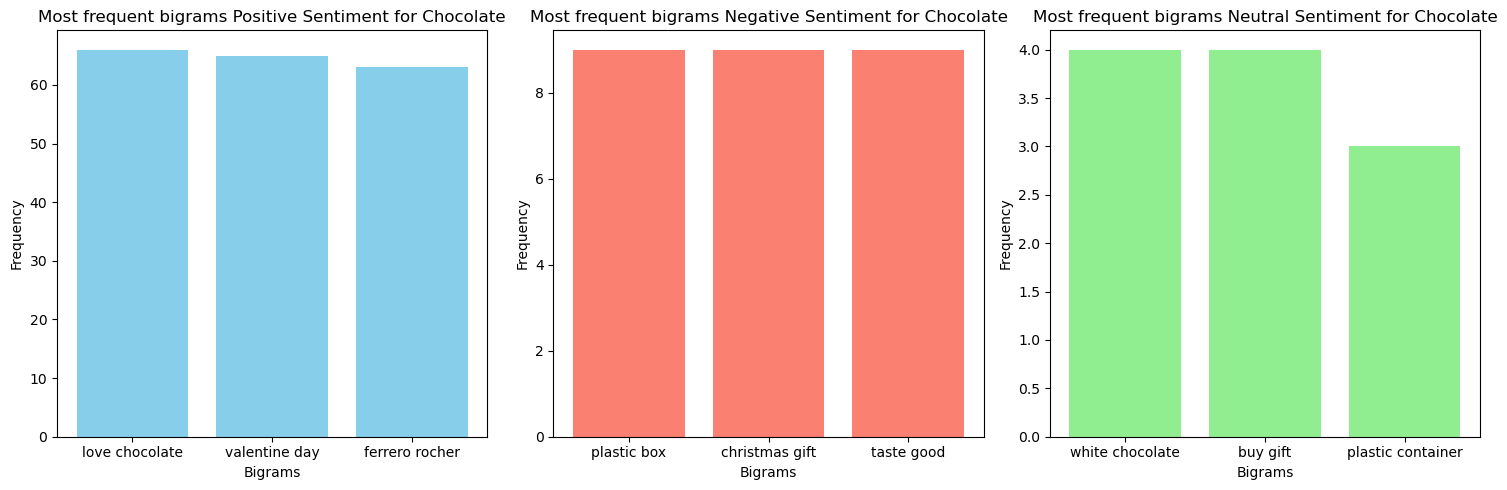

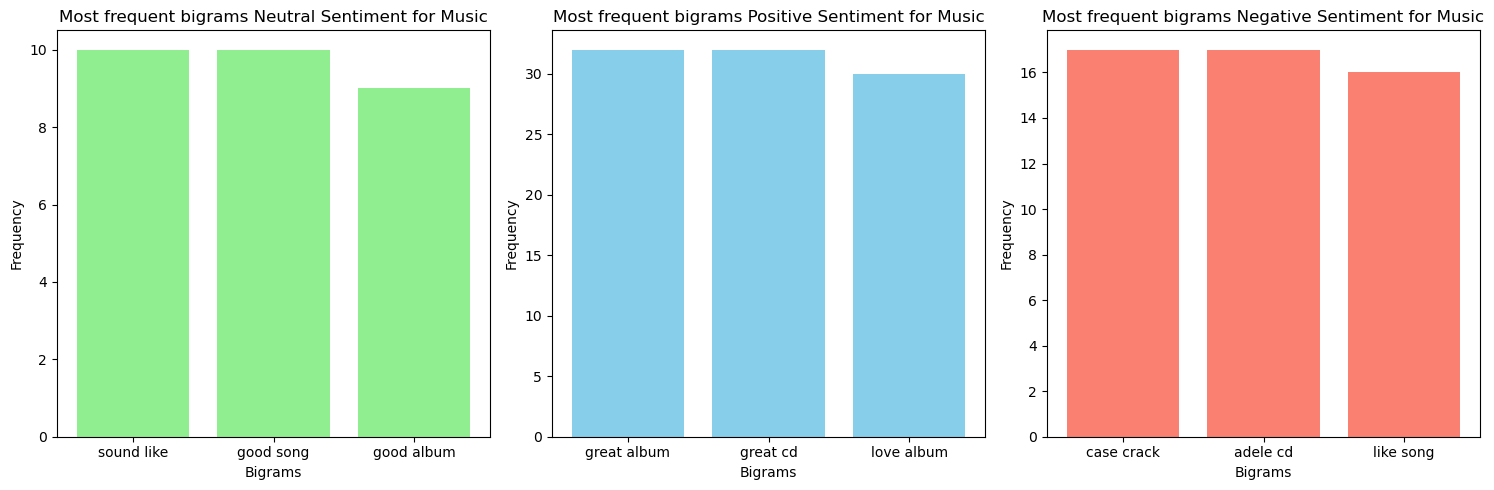

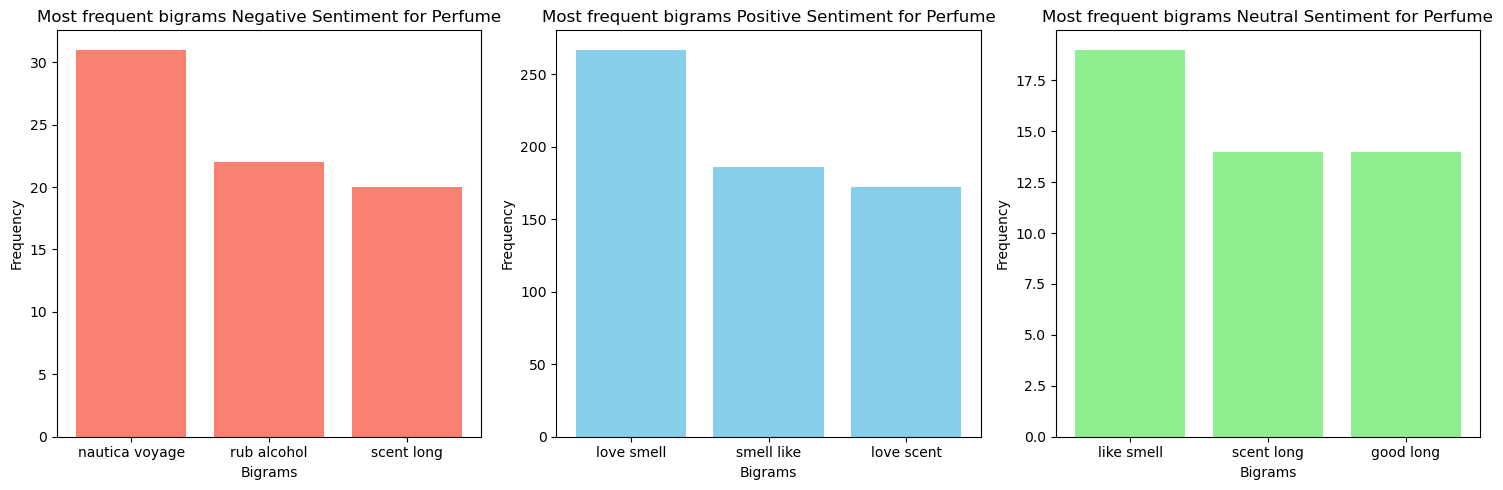

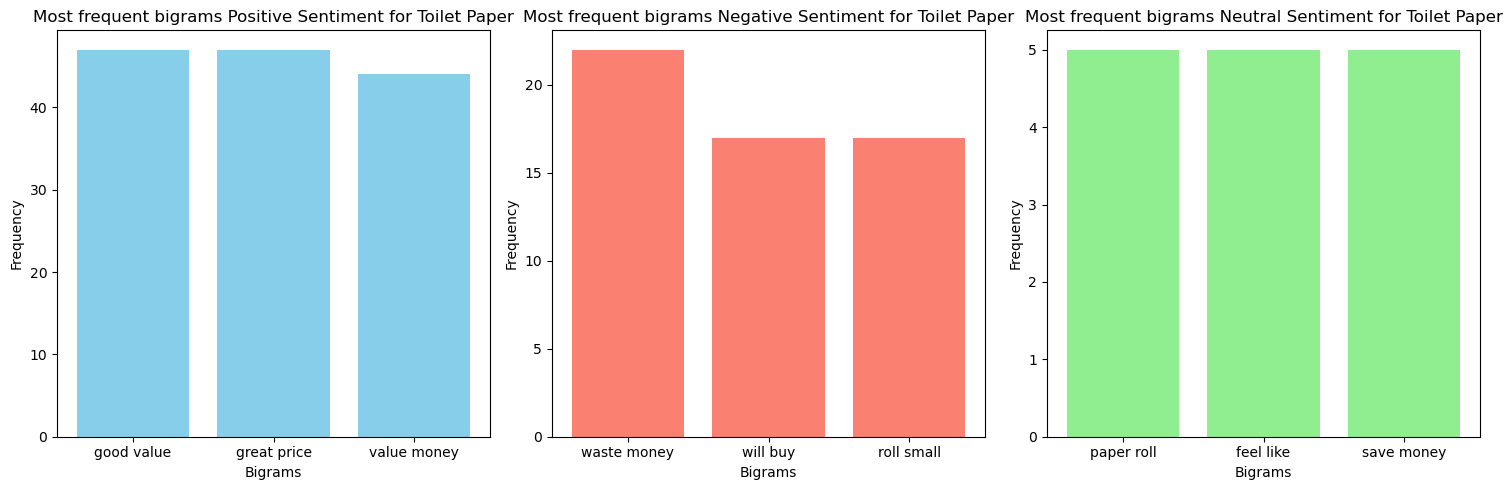

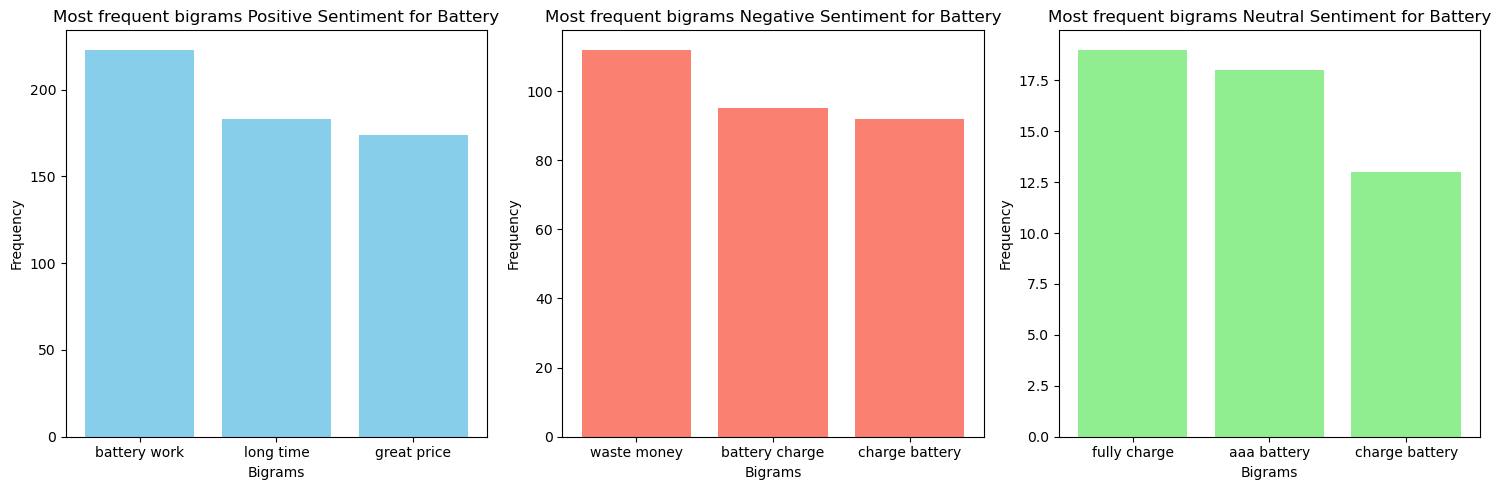

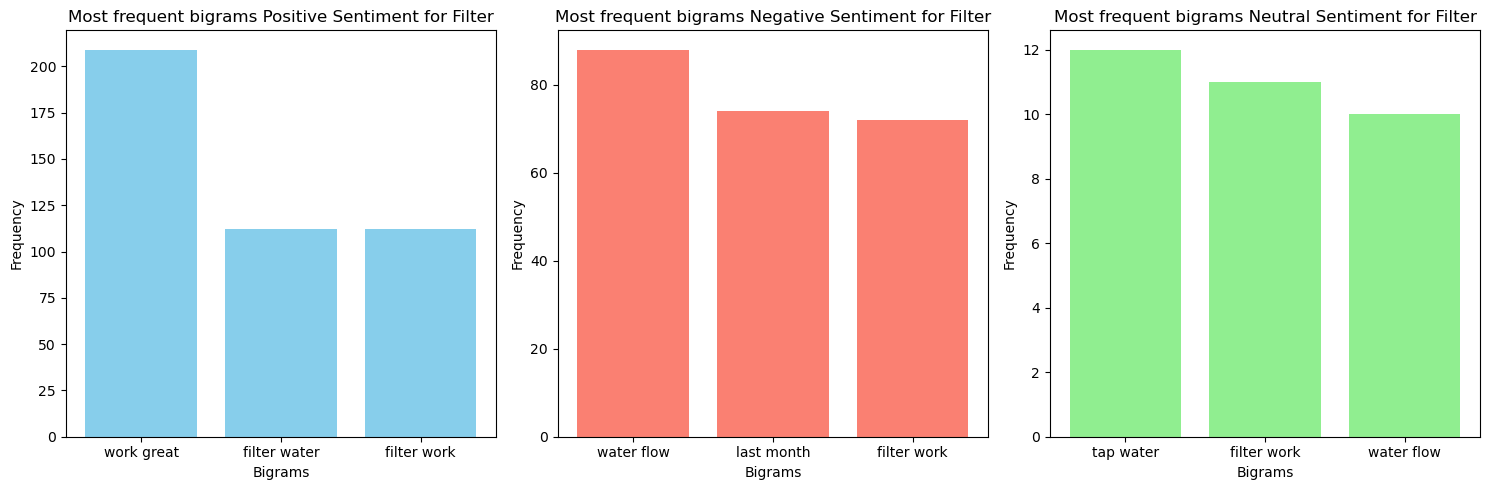

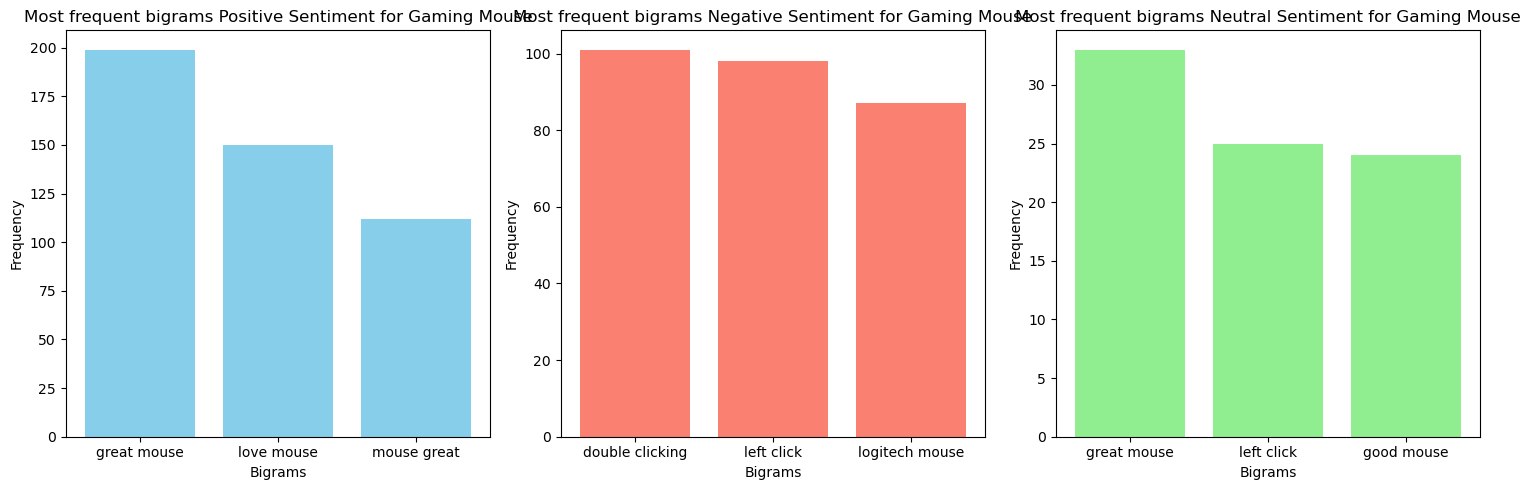

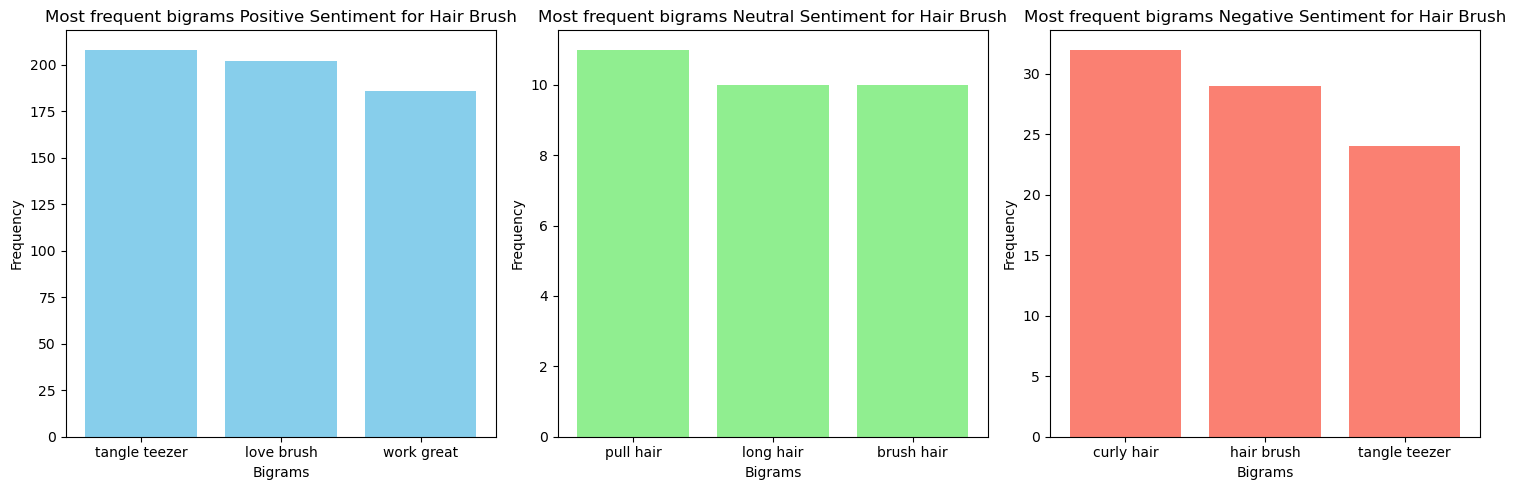

In [ ]:
plot_top_bigrams_by_product (data, sentiment_column='Sentiment_Classification2', text_column='text_cleaned1', product_column='product' )